# Predicting Turbine Energy Yield (TEY) Using Ambient Variables As Features.

## Data Description:

- Variable (Abbr.) : Unit Min Max Mean
- Ambient temperature (AT) : C â€“6.23 37.10 17.71
- Ambient pressure (AP) : mbar 985.85 1036.56 1013.07
- Ambient humidity (AH) : (%) 24.08 100.20 77.87
- Air filter digterence pressure (AFDP) : mbar 2.09 7.61 3.93
- Gas turbine exhaust pressure (GTEP) : mbar 17.70 40.72 25.56
- Turbine inlet temperature (TIT) : C 1000.85 1100.89 1081.43
- Turbine after temperature (TAT) : C 511.04 550.61 546.16
- Compressor discharge pressure (CDP) : mbar 9.85 15.16 12.06
- Turbine energy yield (TEY) : MWH 100.02 179.50 133.51
- Carbon monoxide (CO) : mg/m3 0.00 44.10 2.37
- Nitrogen oxides (NOx) : mg/m3 25.90 119.91 65.29

## Attaching Resources

### Importing Necessary Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, mean_squared_error

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [4]:
gt = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_16_Neural%20Networks/Dataset/gas_turbines.csv')
gt.drop(columns = ['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'], inplace = True)

gt

AT      AP      AH     TEY
0      6.8594  1007.9  96.799  114.70
1      6.7850  1008.4  97.118  114.72
2      6.8977  1008.8  95.939  114.71
3      7.0569  1009.2  95.249  114.72
4      7.3978  1009.7  95.150  114.72
...       ...     ...     ...     ...
15034  9.0301  1005.6  98.460  111.61
15035  7.8879  1005.9  99.093  111.78
15036  7.2647  1006.3  99.496  110.19
15037  7.0060  1006.8  99.008  110.74
15038  6.9279  1007.2  97.533  111.58

[15039 rows x 4 columns]

In [ ]:
gt_nrow = gt.shape[0]

In [ ]:
def lost_record():

    gt_nrow_now = gt.shape[0]
    lost = gt_nrow - gt_nrow_now
    lost = (lost/gt_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [5]:
gt.describe()

AT           AP            AH           TEY
count  15039.000000  15039.00000  15039.000000  15039.000000
mean      17.764381   1013.19924     79.124174    134.188464
std        7.574323      6.41076     13.793439     15.829717
min        0.522300    985.85000     30.344000    100.170000
25%       11.408000   1008.90000     69.750000    127.985000
50%       18.186000   1012.80000     82.266000    133.780000
75%       23.862500   1016.90000     90.043500    140.895000
max       34.929000   1034.20000    100.200000    174.610000

In [6]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [7]:
gt.isna().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [8]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [9]:
uni(gt)


 All Unique Value in AT
[ 0.5223   0.58759  0.60394 ... 34.831   34.903   34.929  ]
Total no of unique values 12086

 All Unique Value in AP
[ 985.85  986.16  986.25  986.41  986.43  986.56  986.78  986.87  987.31
  987.43  987.5   987.56  987.84  988.11  988.2   988.21  988.34  988.5
  988.63  988.65  988.82  988.87  988.97  989.32  989.67  989.93  990.22
  990.28  990.87  991.01  991.17  991.25  991.73  992.37  992.42  992.89
  993.01  993.23  993.3   993.39  993.42  993.51  993.55  993.59  993.76
  993.9   993.93  993.97  994.1   994.12  994.17  994.19  994.25  994.31
  994.37  994.5   994.6   994.7   994.75  994.76  994.89  994.95  995.
  995.14  995.23  995.25  995.28  995.4   995.63  995.66  995.74  995.76
  995.78  995.79  995.84  995.87  995.92  995.95  995.96  996.01  996.02
  996.16  996.17  996.23  996.26  996.28  996.29  996.3   996.34  996.35
  996.37  996.47  996.52  996.55  996.62  996.66  996.73  996.84  996.89
  996.91  996.94  996.96  997.04  997.23  997.27  997.33  

### Checking for Duplicated Values

In [10]:
gt[gt.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, TEY]
Index: []

- There is no duplicate vale in are dataset

### Visualizing The Data

#### Ploting Boxplot

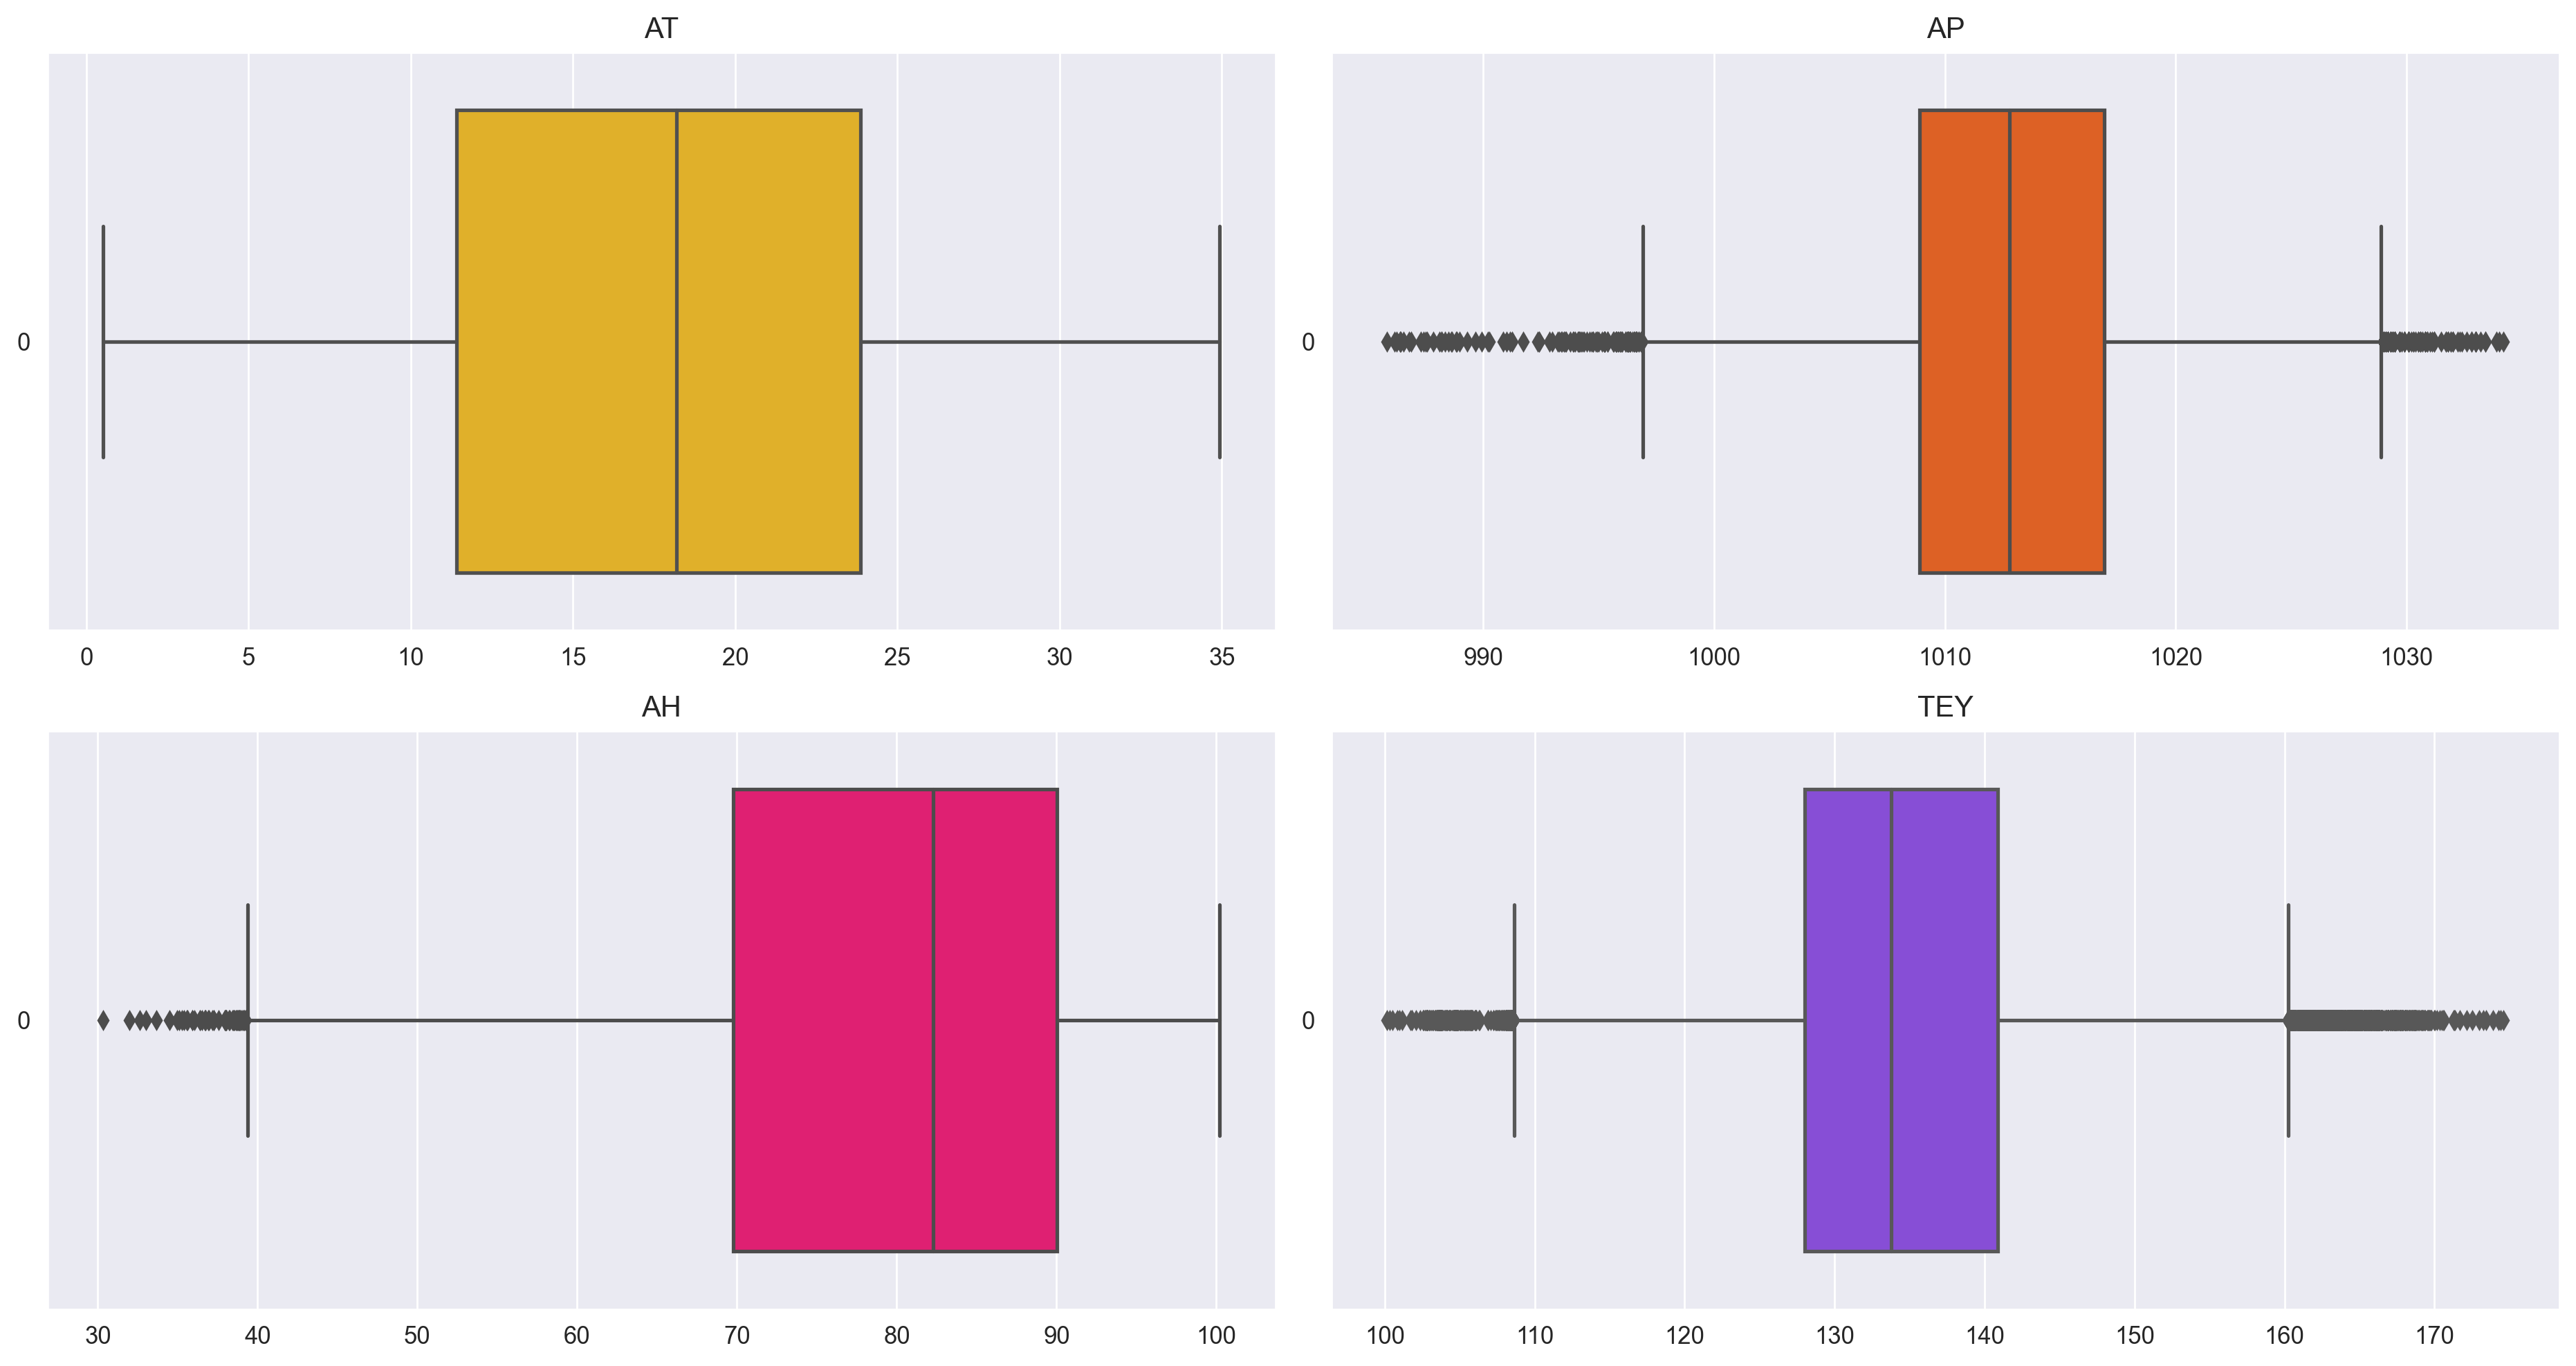

In [22]:
fig,ax = plt.subplots(2, 2)

ax[0, 0].title.set_text('AT')
sns.boxplot(gt['AT'], ax = ax[0, 0], palette = ['#ffbe0b'], orient = 'h')

ax[0, 1].title.set_text('AP')
sns.boxplot(gt['AP'], ax = ax[0, 1], palette = ['#fb5607'], orient = 'h')

ax[1, 0].title.set_text('AH')
sns.boxplot(gt['AH'], ax = ax[1, 0], palette = ['#ff006e'], orient = 'h')

ax[1, 1].title.set_text('TEY')
sns.boxplot(gt['TEY'], ax = ax[1, 1], palette = ['#8338ec'], orient = 'h')

plt.tight_layout()

#### Ploting Distplot

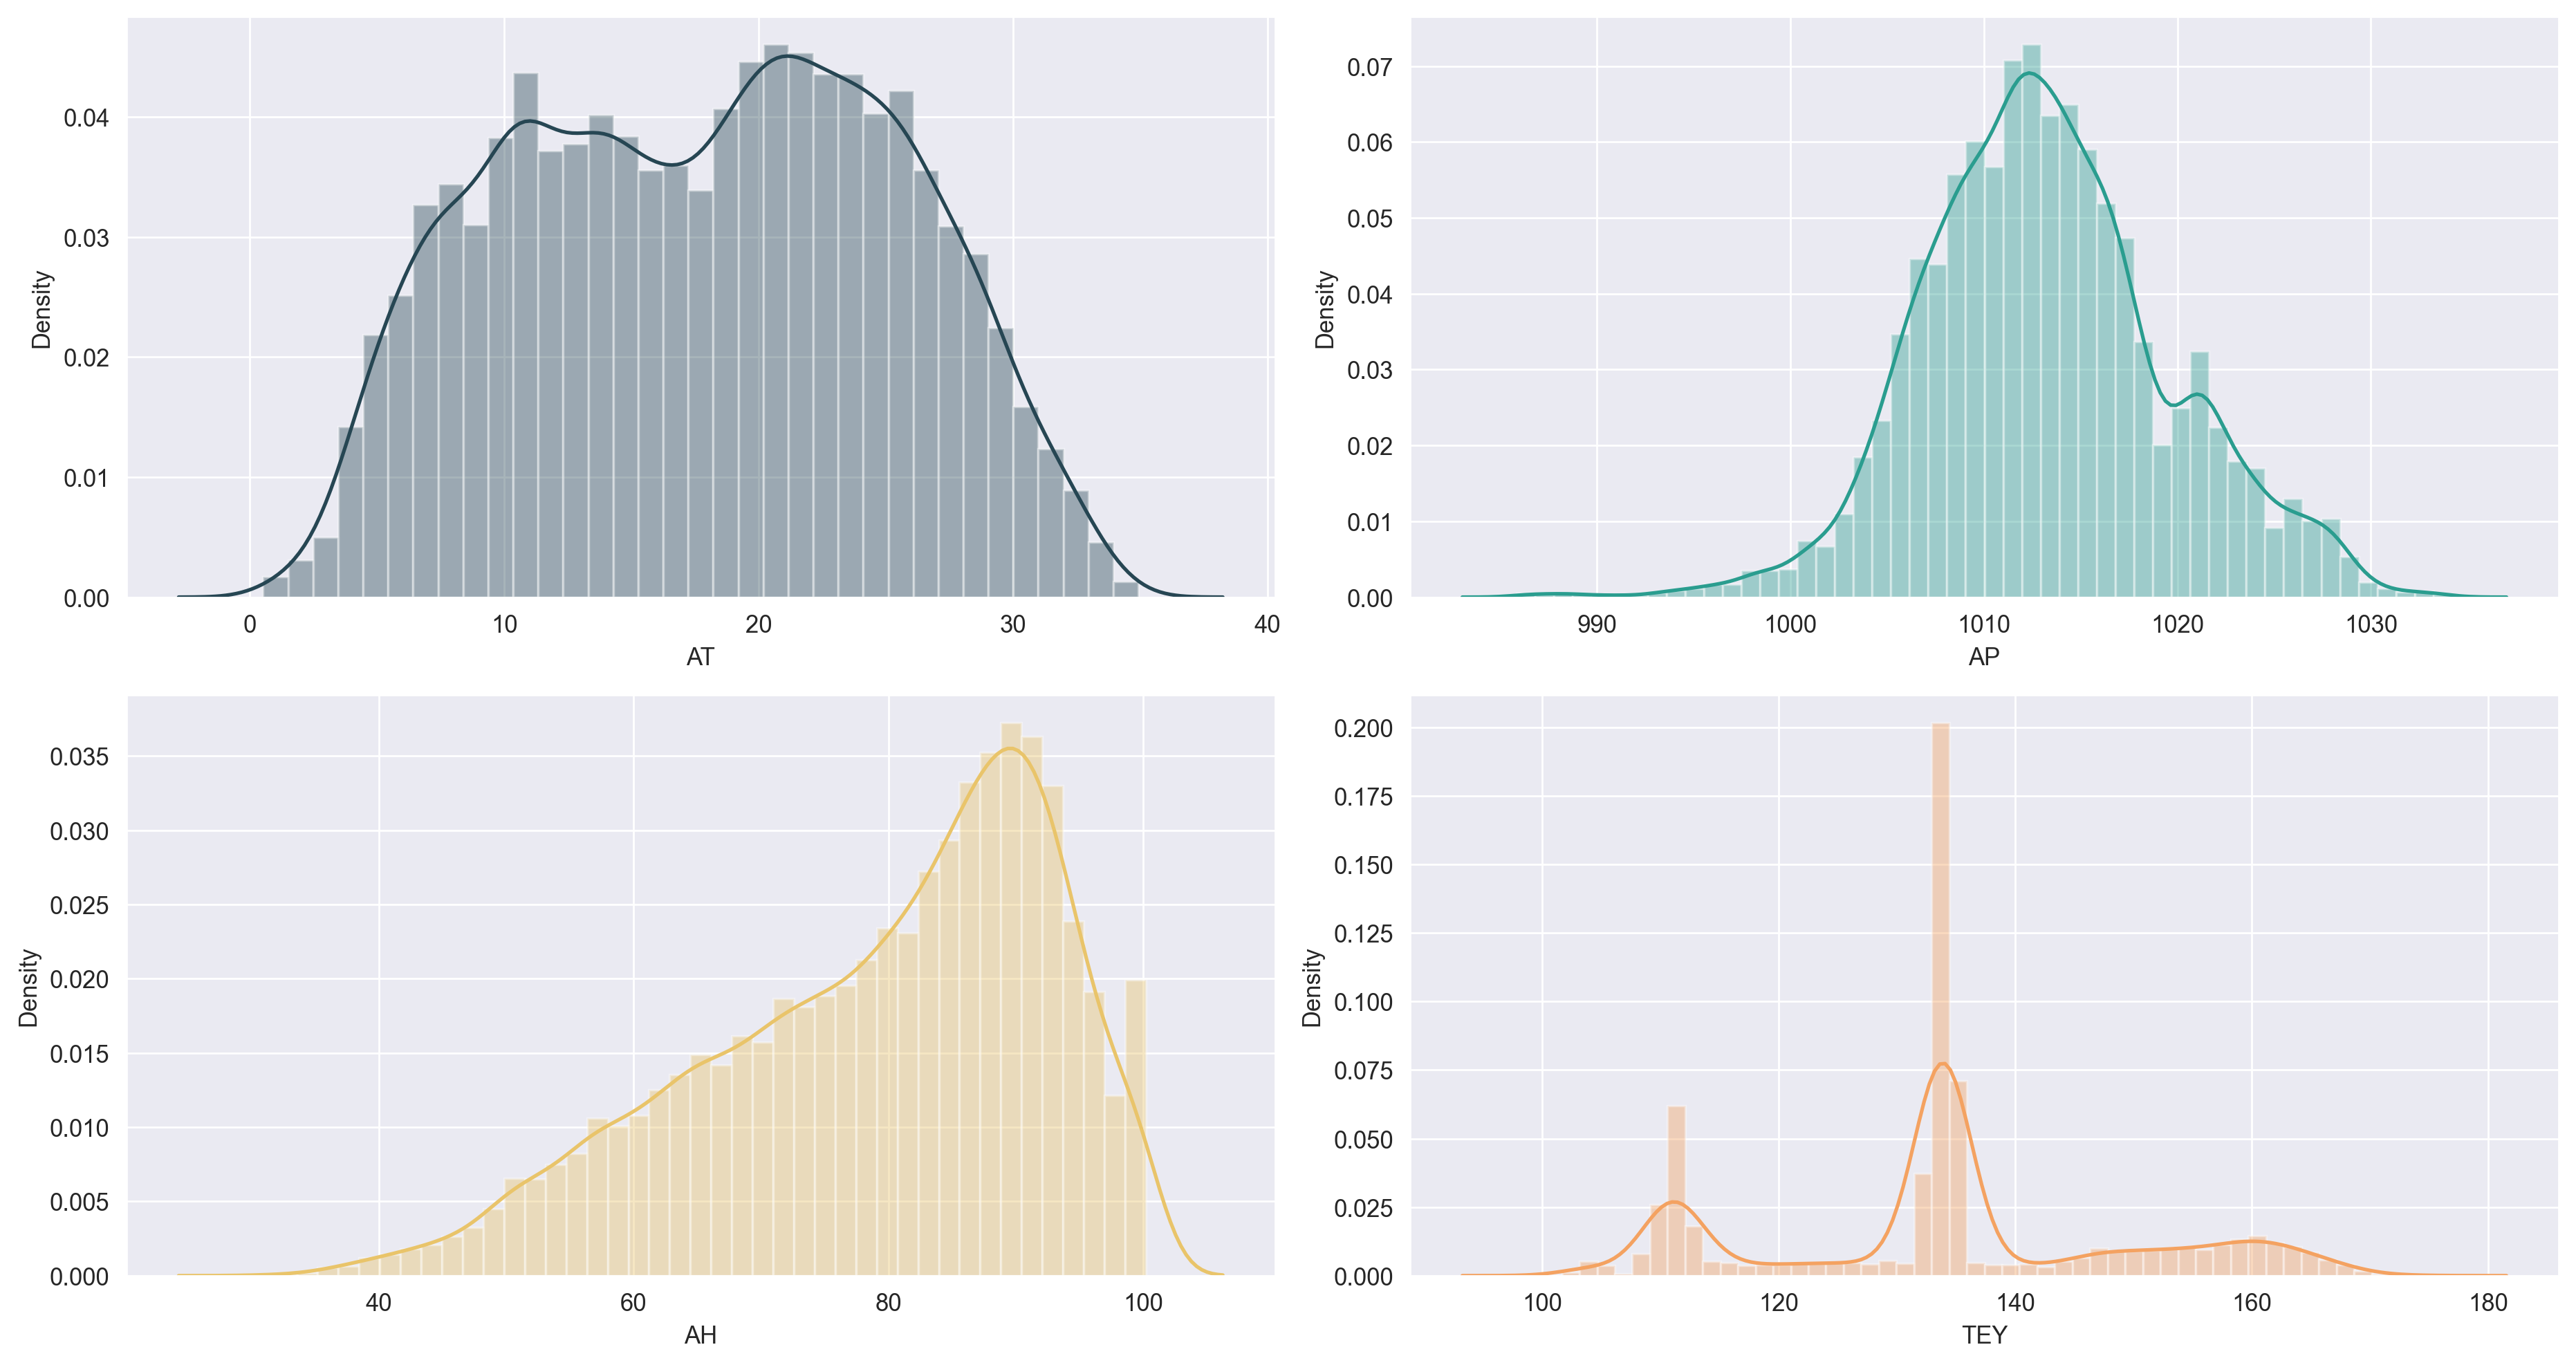

In [30]:
fig,ax = plt.subplots(2, 2)


sns.distplot(gt['AT'], ax = ax[0, 0], color = '#264653')


sns.distplot(gt['AP'], ax = ax[0, 1], color = '#2a9d8f')


sns.distplot(gt['AH'], ax = ax[1, 0], color = '#e9c46a')


sns.distplot(gt['TEY'], ax = ax[1, 1], color = '#f4a261')

plt.tight_layout()

#### Ploting QQ-Plot

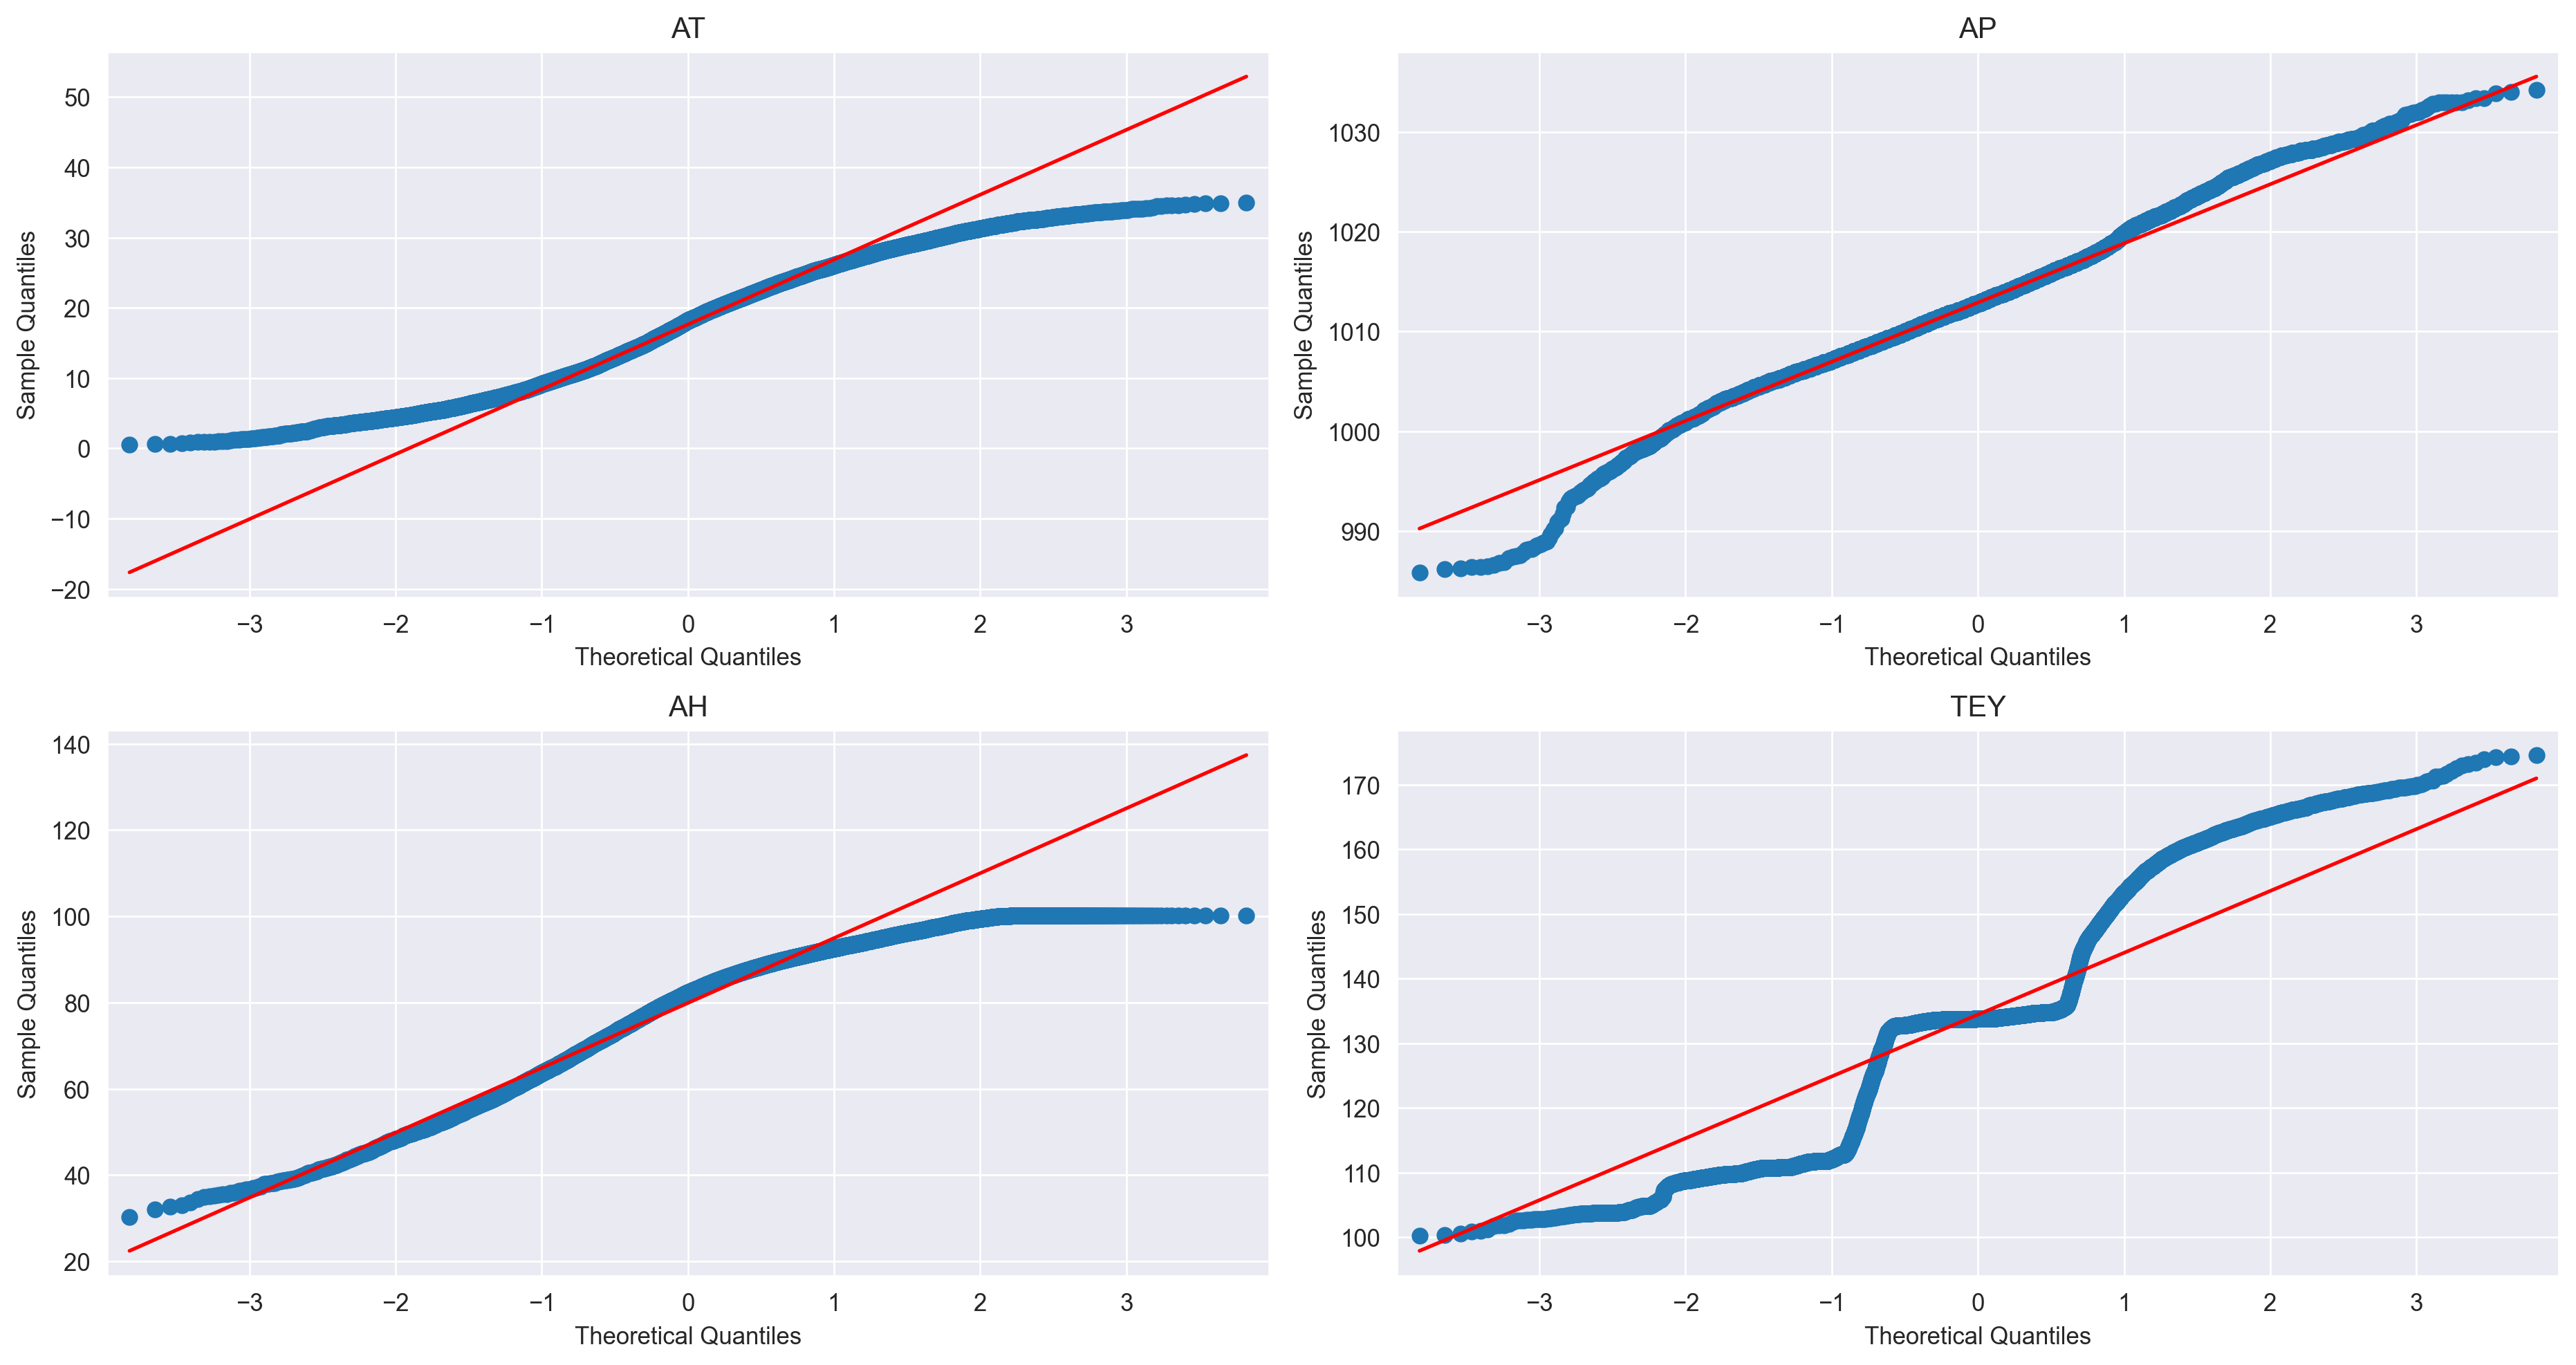

In [38]:
fig,ax = plt.subplots(2, 2)

ax[0, 0].title.set_text('AT')
sm.qqplot(gt['AT'], ax = ax[0, 0], line = 'q')

ax[0, 1].title.set_text('AP')
sm.qqplot(gt['AP'], ax = ax[0, 1], line = 'q')

ax[1, 0].title.set_text('AH')
sm.qqplot(gt['AH'], ax = ax[1, 0], line = 'q')

ax[1, 1].title.set_text('TEY')
sm.qqplot(gt['TEY'], ax = ax[1, 1], line = 'q')

plt.tight_layout()


### Correlation Analysis

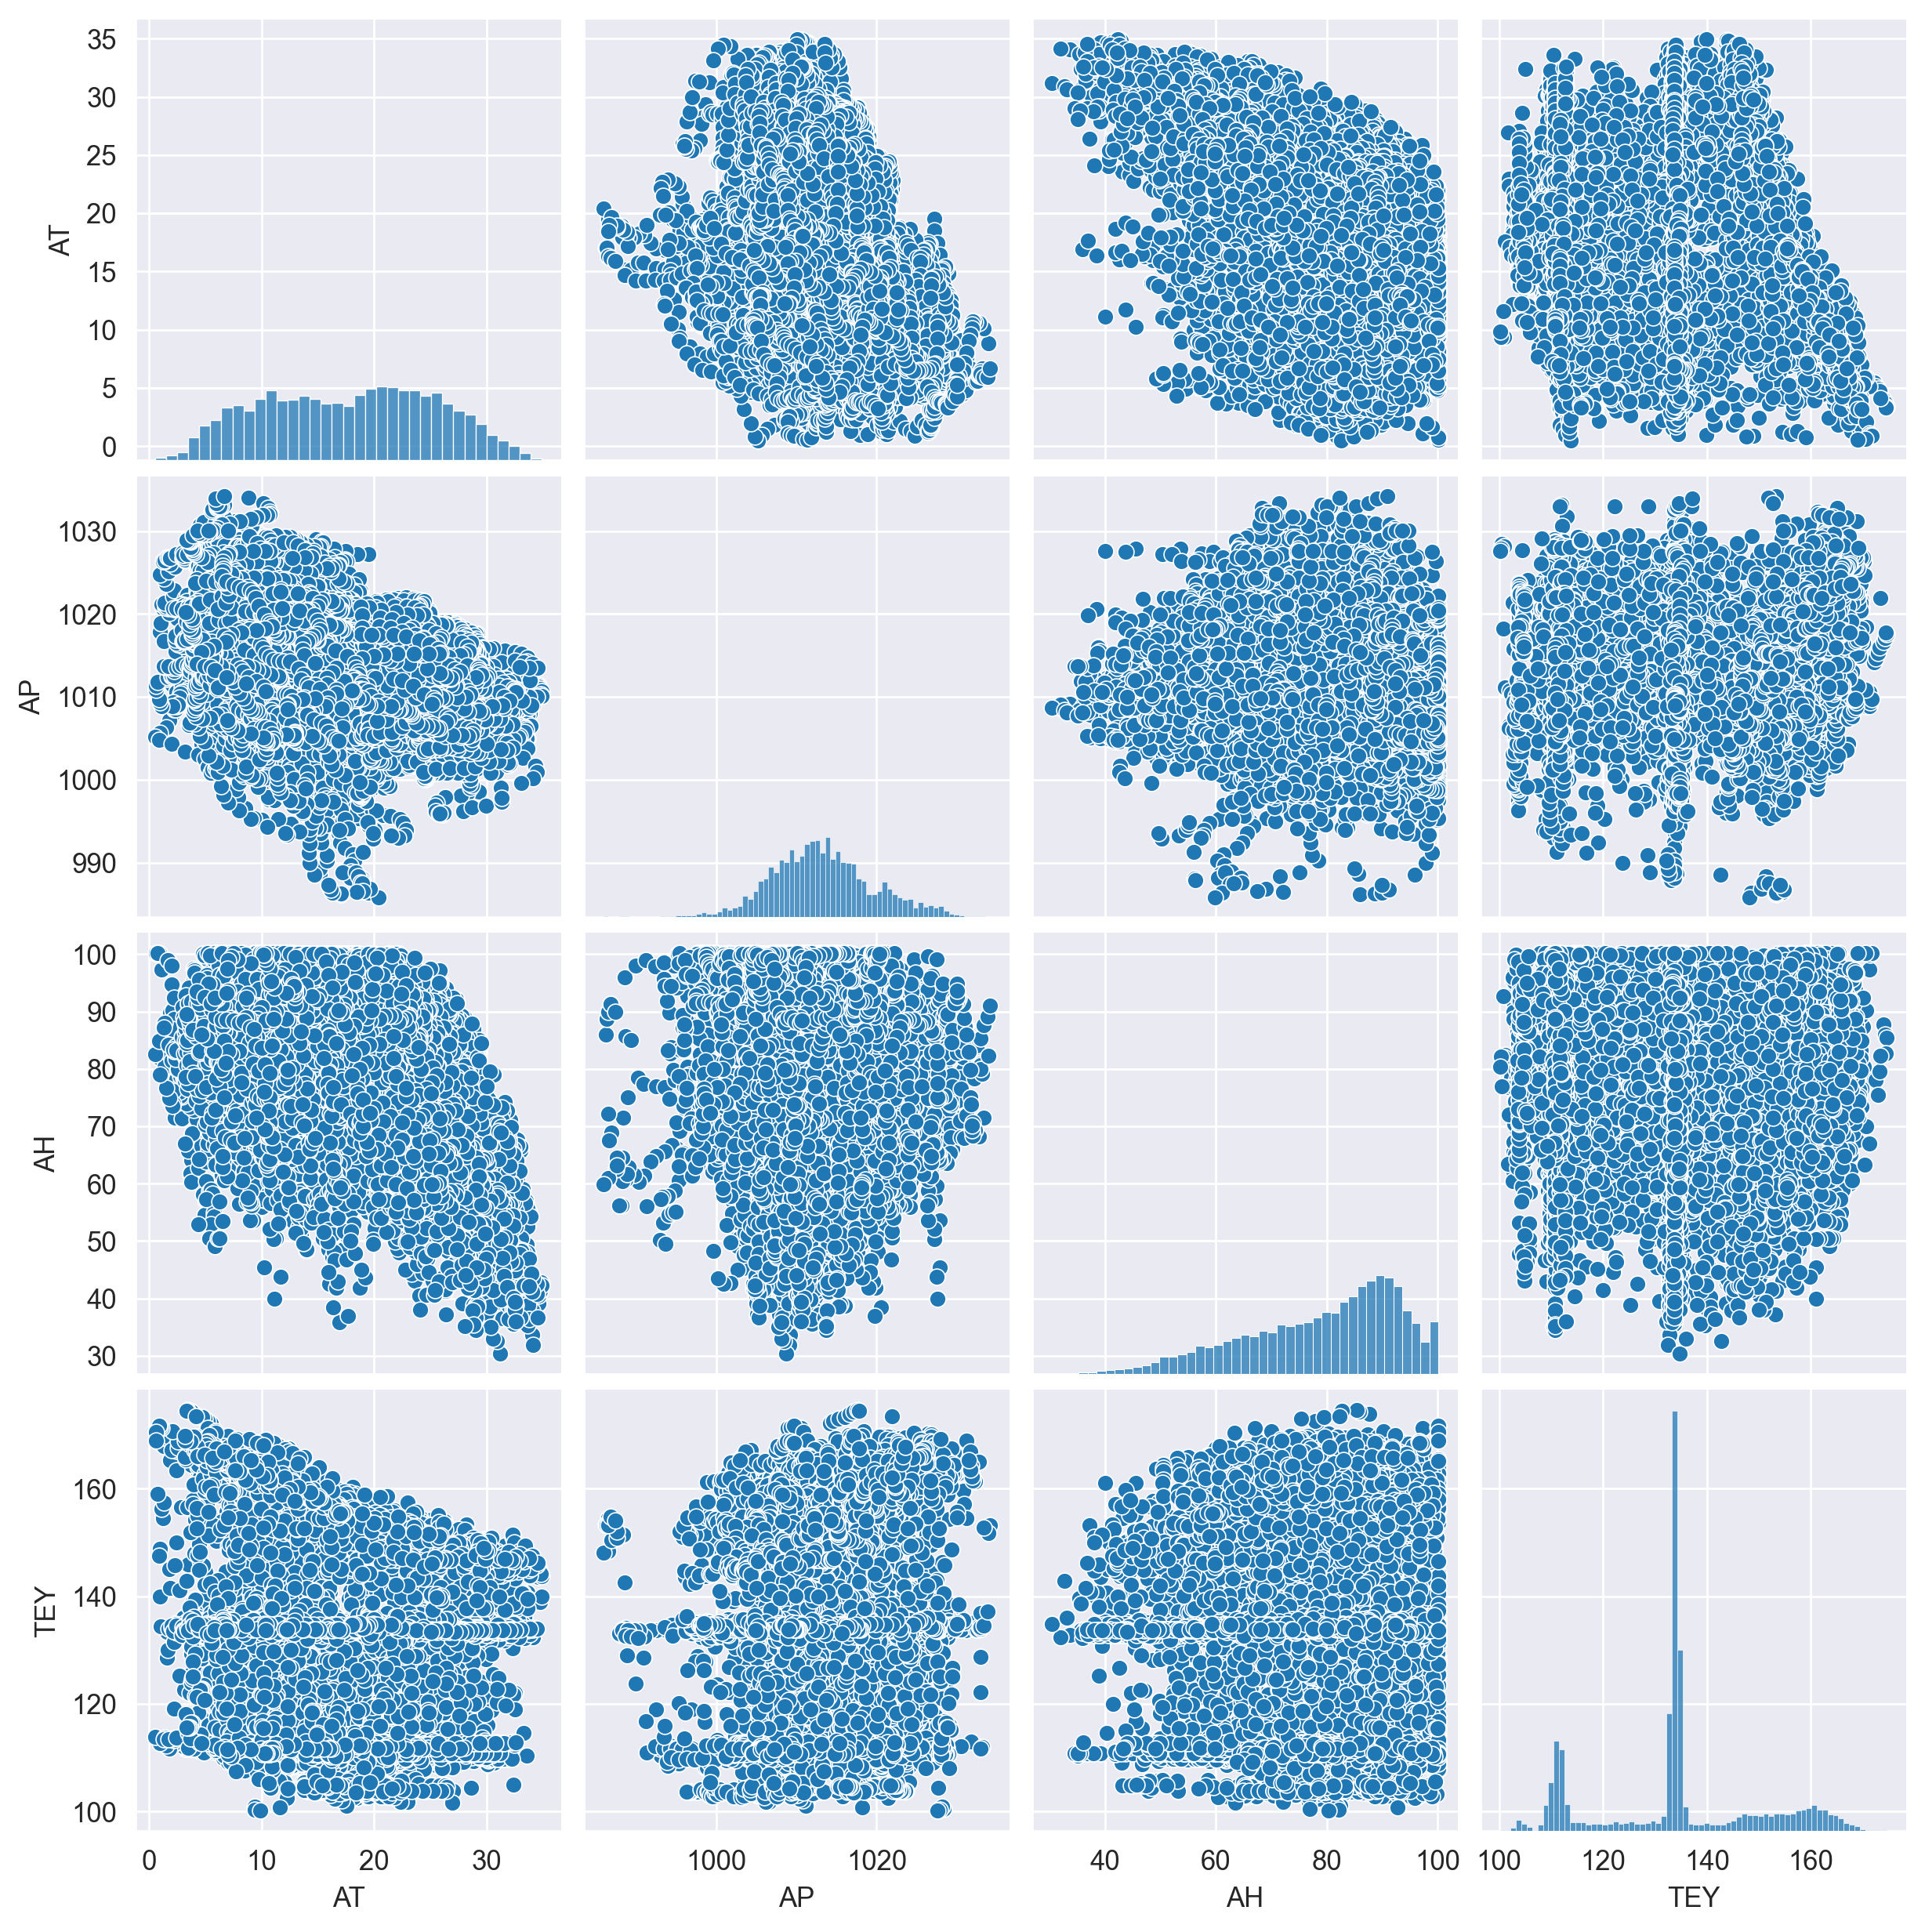

In [41]:
sns.pairplot(gt)

plt.show()

<AxesSubplot:>

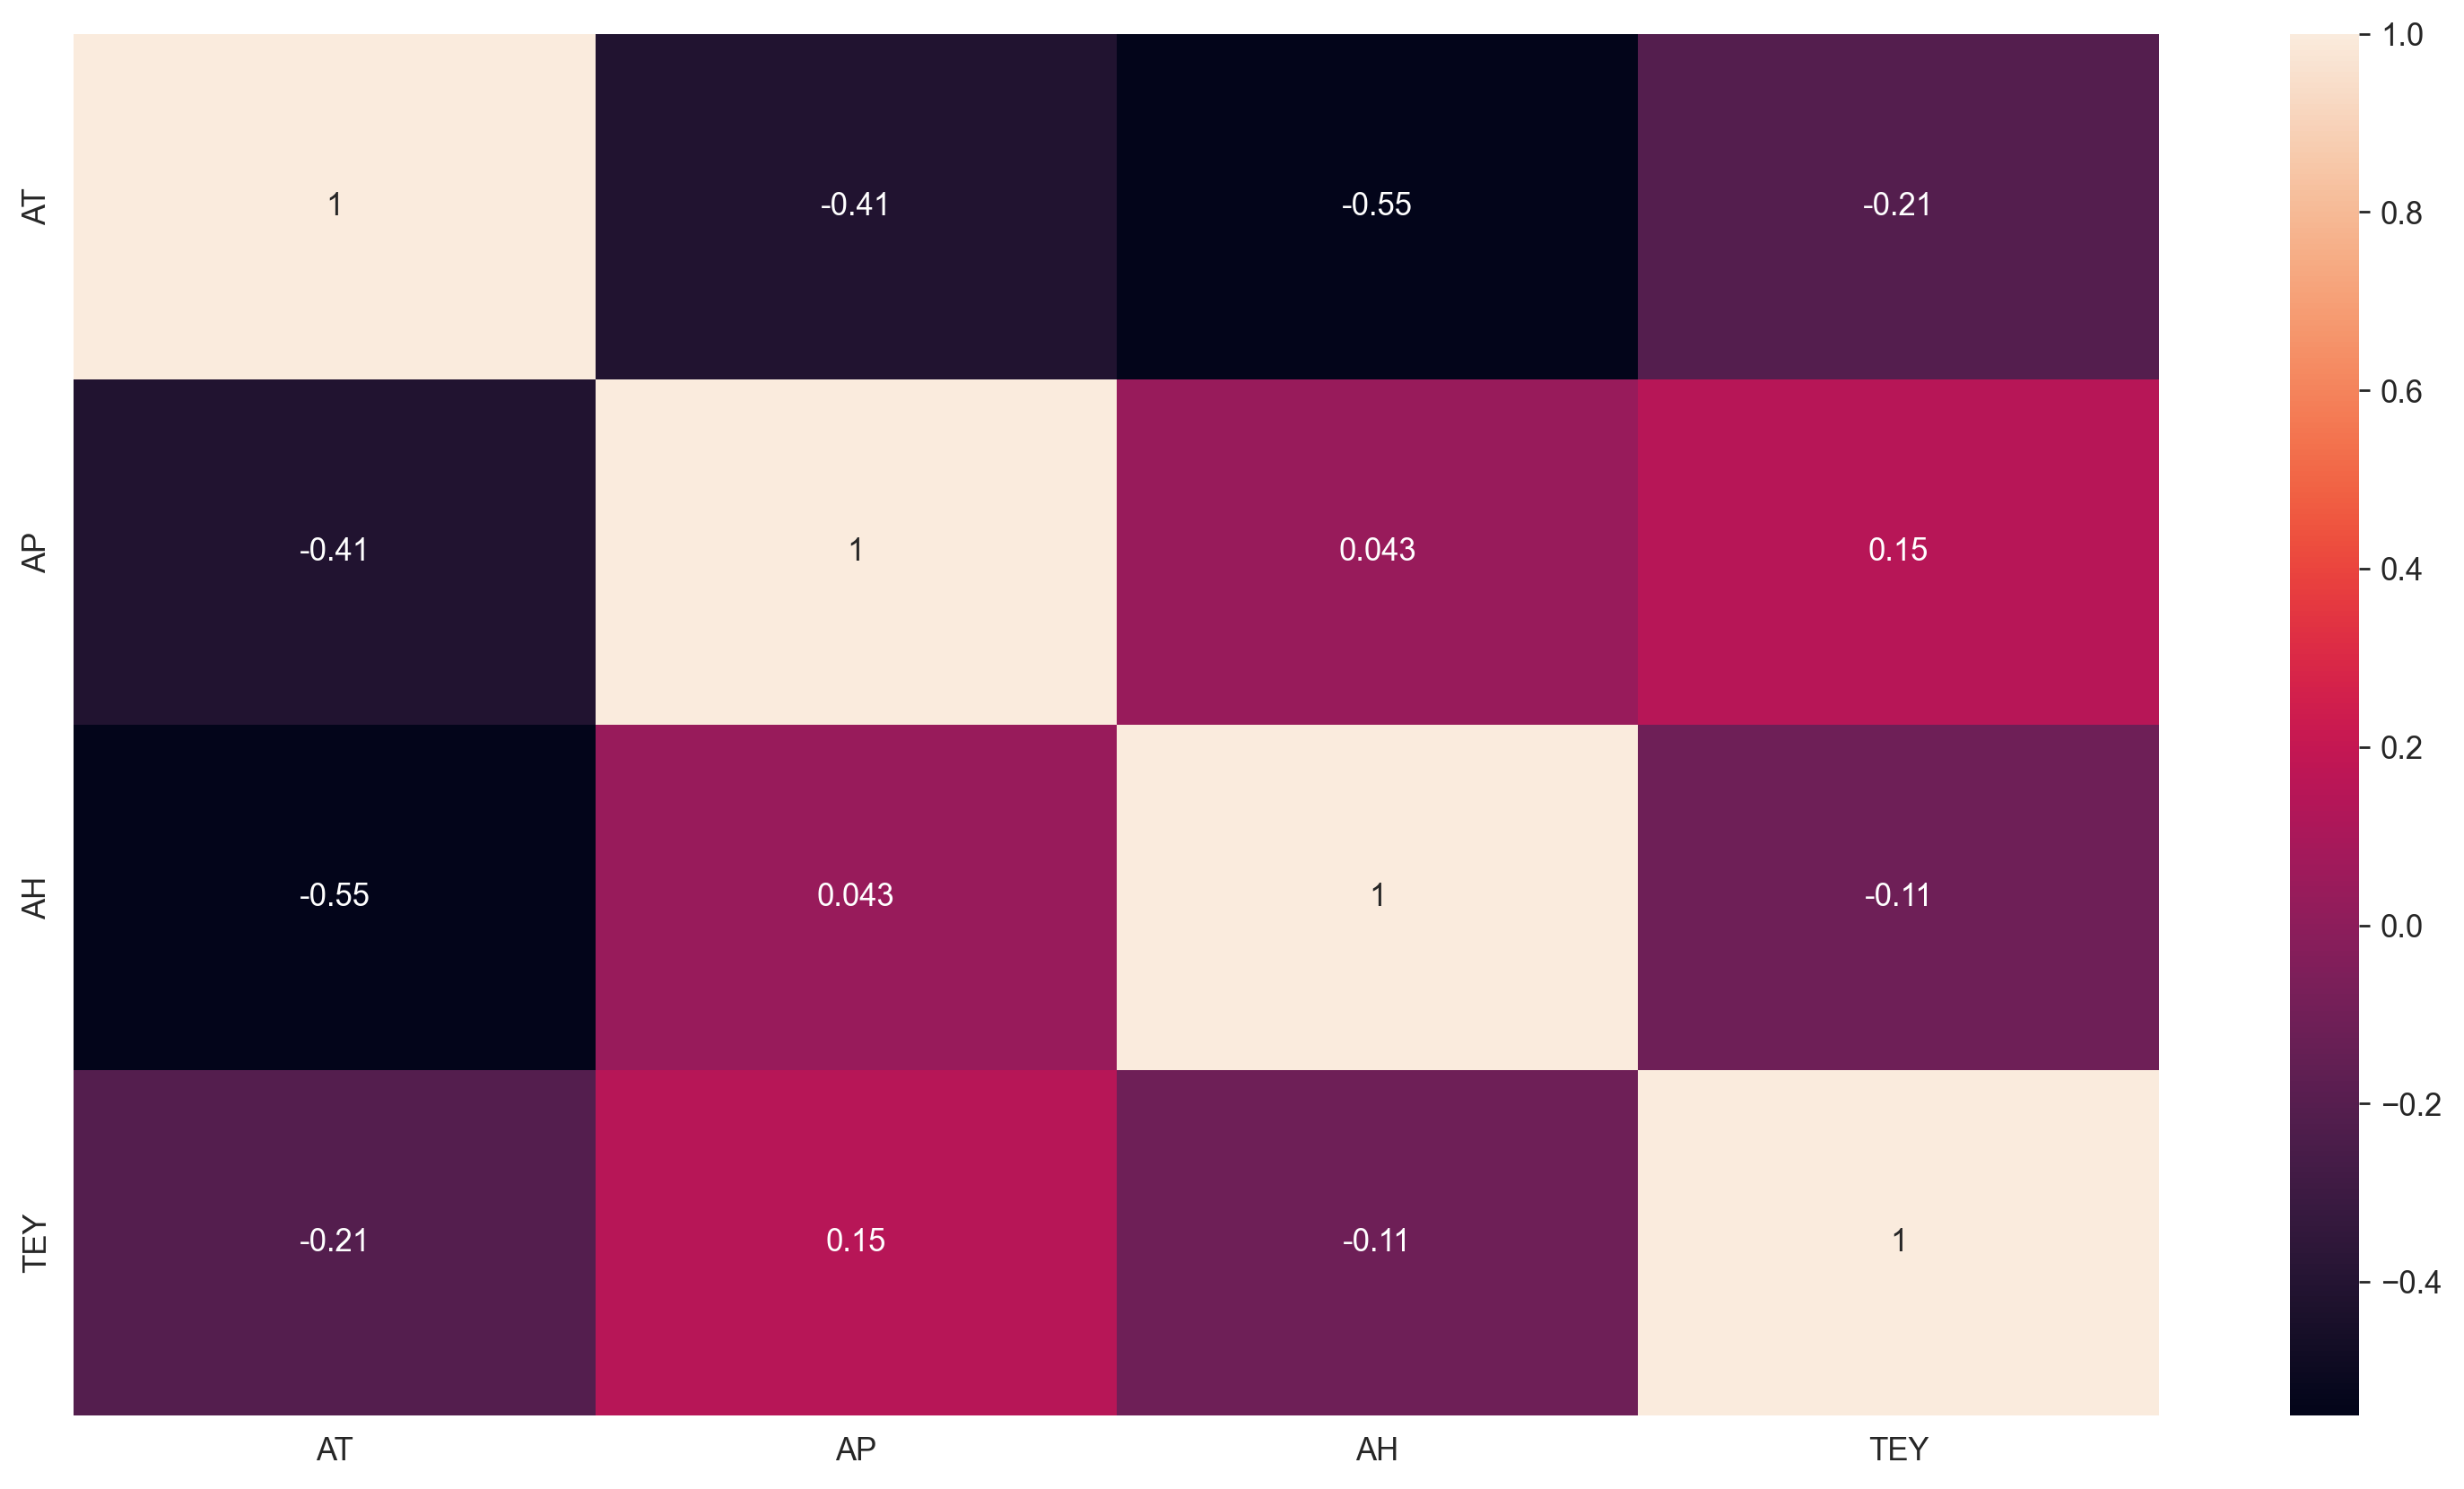

In [42]:
sns.heatmap(gt.corr(), annot = True)

### Outlier Detection

In [43]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')


In [44]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [45]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


#### Outlier Percentage (Before)

In [47]:
outlier_percentage(gt)

AT : 0.0 %
AP : 1.4229669525899329 %
AH : 0.37236518385530953 %
TEY : 10.08710685550901 %


- we dont remove outlier in **target** column.

## Splitting The Data Into Target and Independent set

In [48]:
x = gt.iloc[:,:-1]
y = gt['TEY']

In [49]:
x

AT      AP      AH
0      6.8594  1007.9  96.799
1      6.7850  1008.4  97.118
2      6.8977  1008.8  95.939
3      7.0569  1009.2  95.249
4      7.3978  1009.7  95.150
...       ...     ...     ...
15034  9.0301  1005.6  98.460
15035  7.8879  1005.9  99.093
15036  7.2647  1006.3  99.496
15037  7.0060  1006.8  99.008
15038  6.9279  1007.2  97.533

[15039 rows x 3 columns]

### Normalizing The Dataset

In [50]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [51]:
scaled_x

AT        AP        AH
0     -1.439778 -0.826644  1.281436
1     -1.449601 -0.748647  1.304564
2     -1.434721 -0.686250  1.219086
3     -1.413702 -0.623853  1.169060
4     -1.368693 -0.545857  1.161883
...         ...       ...       ...
15034 -1.153182 -1.185428  1.401860
15035 -1.303986 -1.138630  1.447753
15036 -1.386267 -1.076233  1.476971
15037 -1.420423 -0.998236  1.441590
15038 -1.430734 -0.935839  1.334652

[15039 rows x 3 columns]

### Splitting The Data Into Training And Testing Set

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,train_size=0.75,random_state=1)

In [53]:
xtrain

AT        AP        AH
8033  -1.214338  0.452498  0.951776
6802  -1.051400  1.294860  0.572670
11267  0.230737  0.733285  1.248231
5411  -0.154657  0.343303  0.421869
13194  0.769285 -0.218272  0.674968
...         ...       ...       ...
905   -1.811256  1.326058  0.135129
5192   0.640952 -0.748647 -0.064901
12172  1.728346 -1.060633 -1.773306
235   -1.375374  0.951675 -0.112606
13349  0.513808  0.109314  0.897038

[11279 rows x 3 columns]

## Preparing Model From The Dataset

### Creating Default Model With ANN

#### Creating ann_def Model

In [54]:
ann_def =Sequential()

##### Creating Hidden Layer

In [55]:
ann_def.add(Dense(units=30, activation='linear'))
ann_def.add(Dense(units=20, activation='relu'))

##### Creating Output Layer

In [59]:
ann_def.add(Dense(units=1))

##### Connecting All Neurons In Each Layer

In [60]:
ann_def.compile(optimizer='adam', loss='mse')

##### Fitting Data

In [58]:
ann_def.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 50)

Epoch 1/50
353/353 [==============================] - 9s 7ms/step - loss: -6414.5977 - val_loss: -25734.8184
Epoch 2/50
353/353 [==============================] - 2s 6ms/step - loss: -99668.2031 - val_loss: -214603.0625
Epoch 3/50
353/353 [==============================] - 2s 6ms/step - loss: -431683.8125 - val_loss: -706806.1250
Epoch 4/50
353/353 [==============================] - 2s 6ms/step - loss: -1117477.1250 - val_loss: -1594973.6250
Epoch 5/50
353/353 [==============================] - 2s 4ms/step - loss: -2232426.5000 - val_loss: -2938163.0000
Epoch 6/50
353/353 [==============================] - 2s 5ms/step - loss: -3829049.2500 - val_loss: -4783941.0000
Epoch 7/50
353/353 [==============================] - 2s 6ms/step - loss: -5949960.5000 - val_loss: -7171034.5000
Epoch 8/50
353/353 [==============================] - 2s 5ms/step - loss: -8621594.0000 - val_loss: -10117374.0000
Epoch 9/50
353/353 [==============================] - 2s 5ms/step - loss: -11873597.0000 - val_lo

KeyboardInterrupt: 

#### Evaluating The Model

##### Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

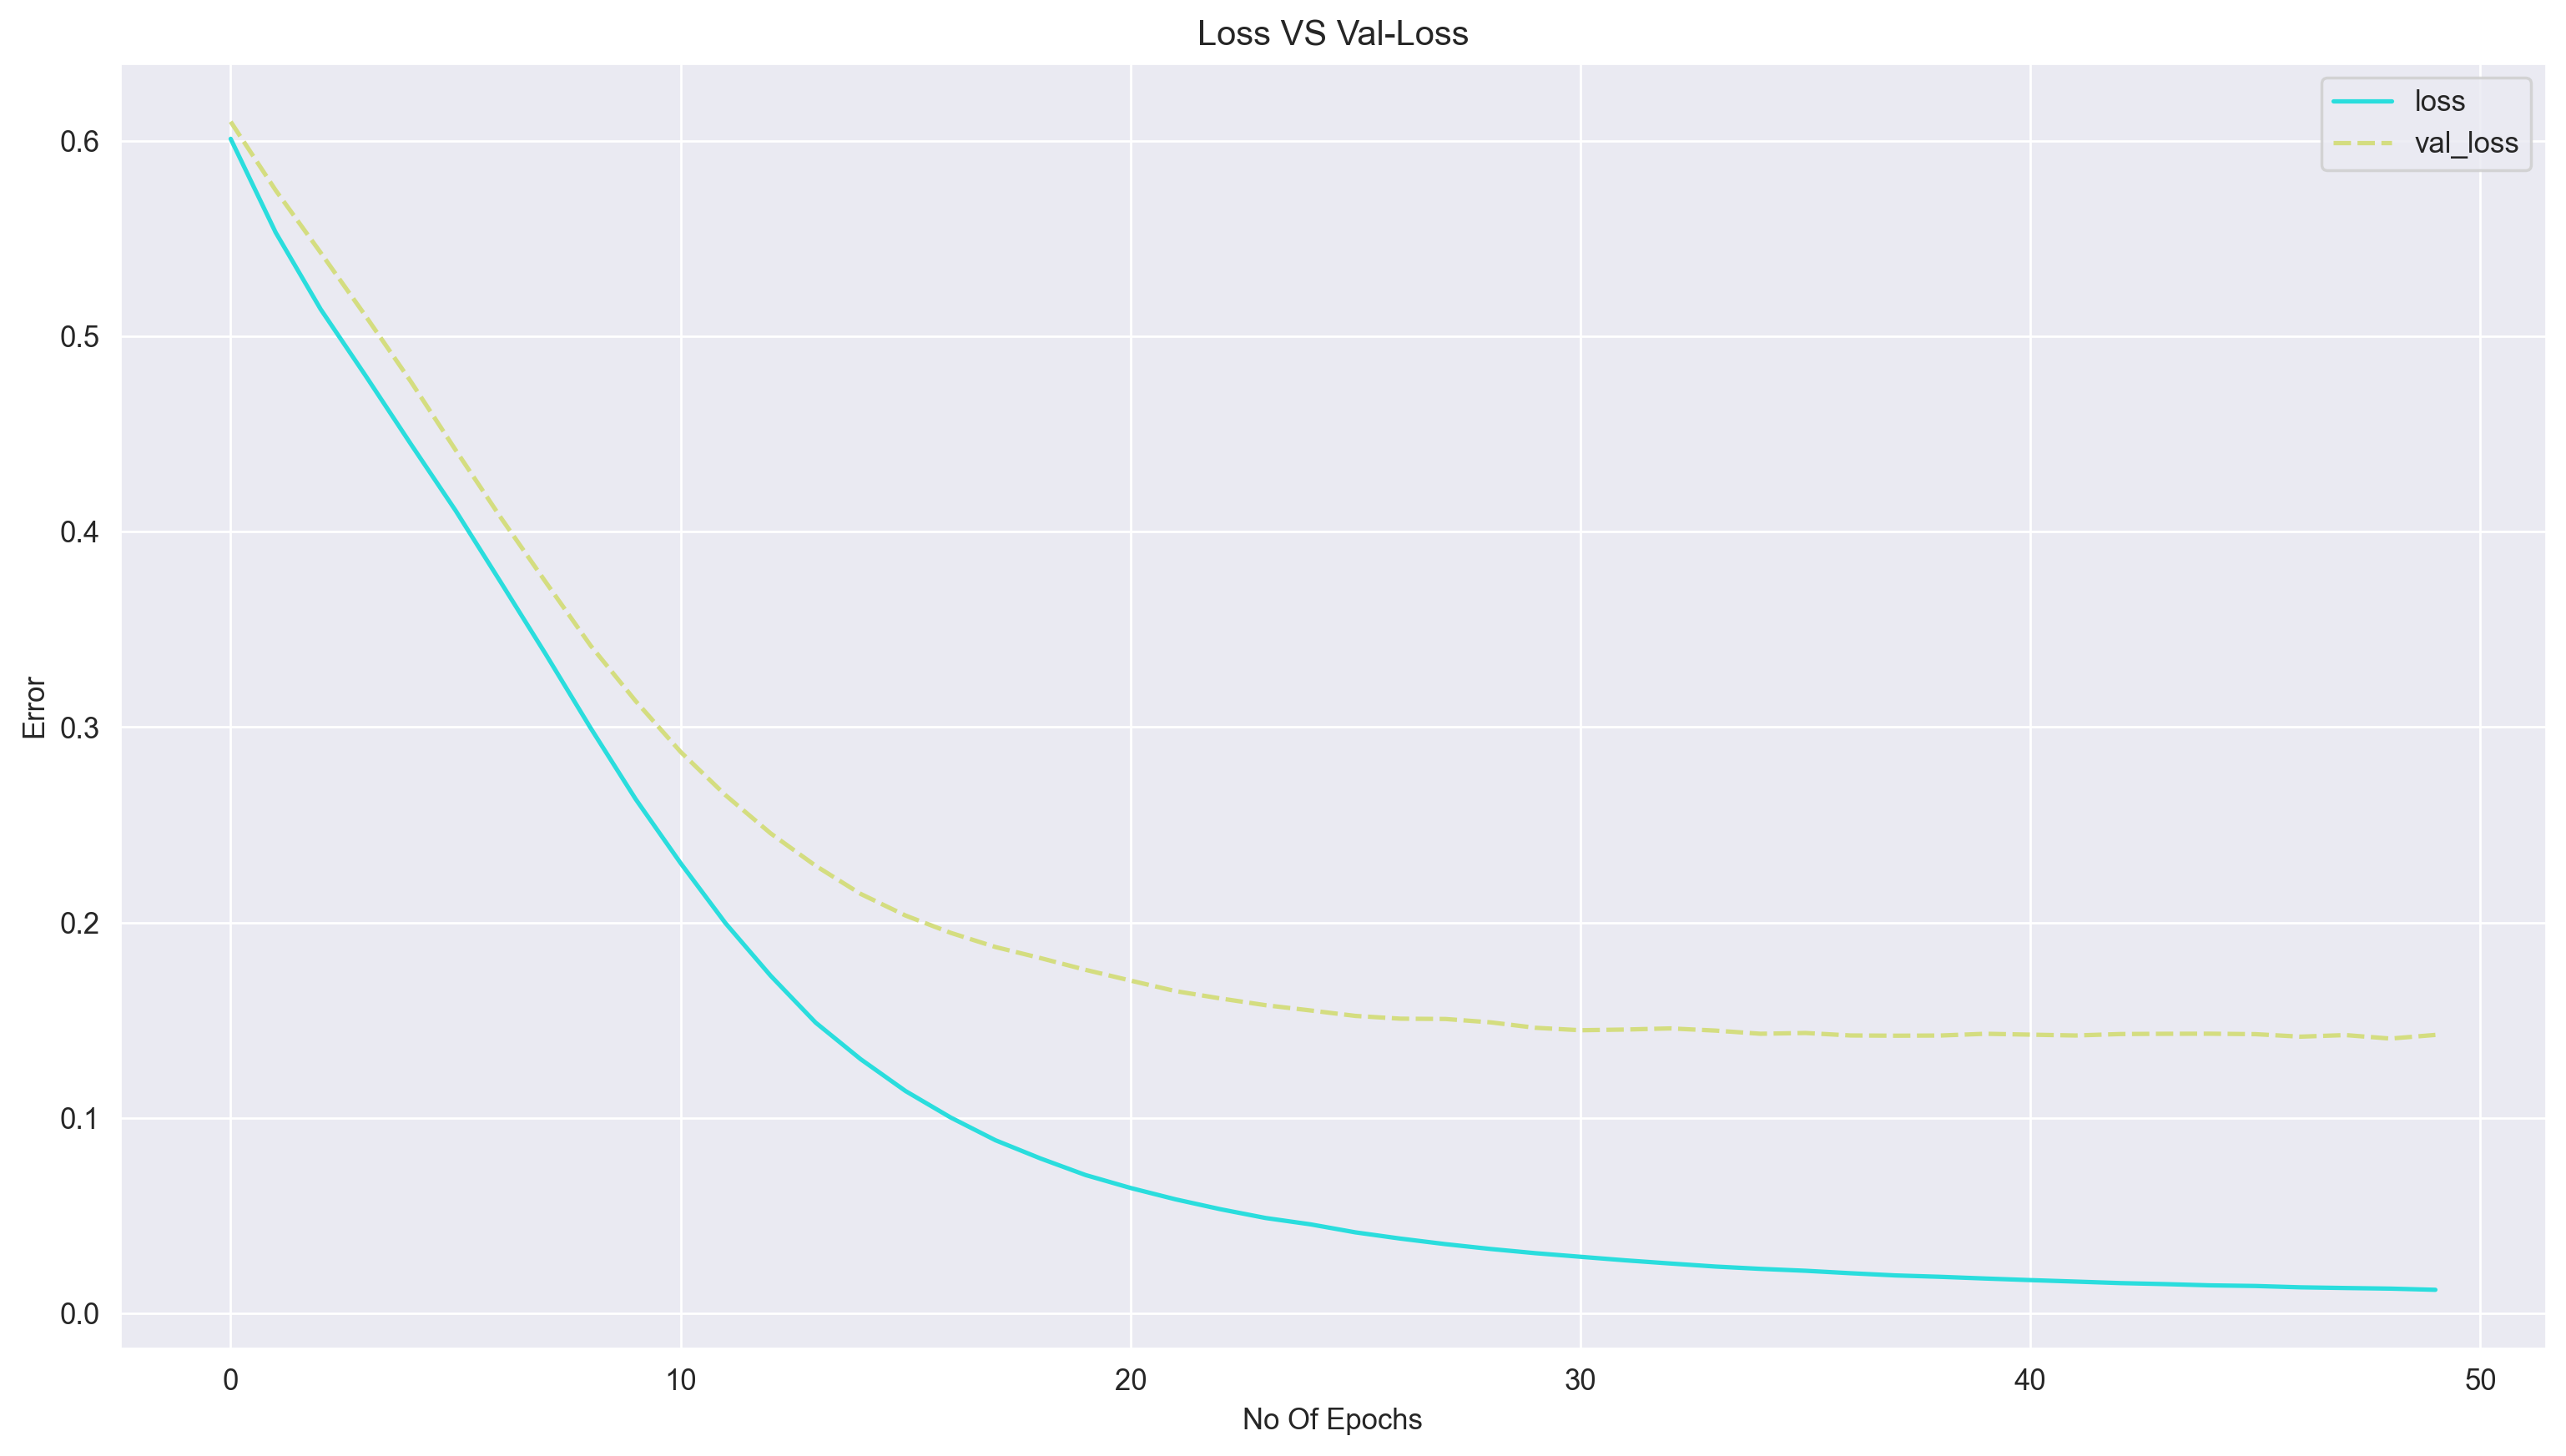

In [ ]:
val_loss_def = pd.DataFrame(ann_def.history.history)

sns.lineplot(data = val_loss_def, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

##### Creating Classification Report

In [ ]:
ypred_def = ann_def.predict(xtest)
ypred_def = ypred_def > 0.5

4/4 [==============================] - 0s 4ms/step


In [ ]:
print(classification_report(ytest,ypred_def))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.92      0.99      0.96        87

    accuracy                           0.93       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.93      0.93      0.93       114



### Creating Model With Early Stopping

#### Creating ann Model

In [ ]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [ ]:
ann_es =Sequential()

##### Creating Hidden Layer

In [ ]:
ann_es.add(Dense(units=30, activation='relu'))
ann_es.add(Dense(units=20, activation='relu'))

##### Creating Output Layer

In [ ]:
ann_es.add(Dense(units=1, activation='sigmoid'))

##### Connecting All Neurons In Each Layer

In [ ]:
ann_es.compile(optimizer='adam', loss='binary_crossentropy')

##### Fitting Data

In [ ]:
ann_es.fit(xtrain, ytrain, validation_data = (xtest, ytest), callbacks=[early] , epochs = 100)

Epoch 1/100
11/11 [==============================] - 2s 33ms/step - loss: 0.8522 - val_loss: 0.7521
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 0.7279 - val_loss: 0.6552
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 0.6410 - val_loss: 0.5954
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 0.5834 - val_loss: 0.5545
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 0.5414 - val_loss: 0.5211
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 0.5054 - val_loss: 0.4918
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: 0.4688 - val_loss: 0.4668
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 0.4359 - val_loss: 0.4406
Epoch 9/100
11/11 [==============================] - 0s 9ms/step - loss: 0.4024 - val_loss: 0.4154
Epoch 10/100
11/11 [==============================] - 0s 9ms/step - loss: 0.3691 - val_loss: 0.3898
Epoch

#### Evaluating The Model

##### Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

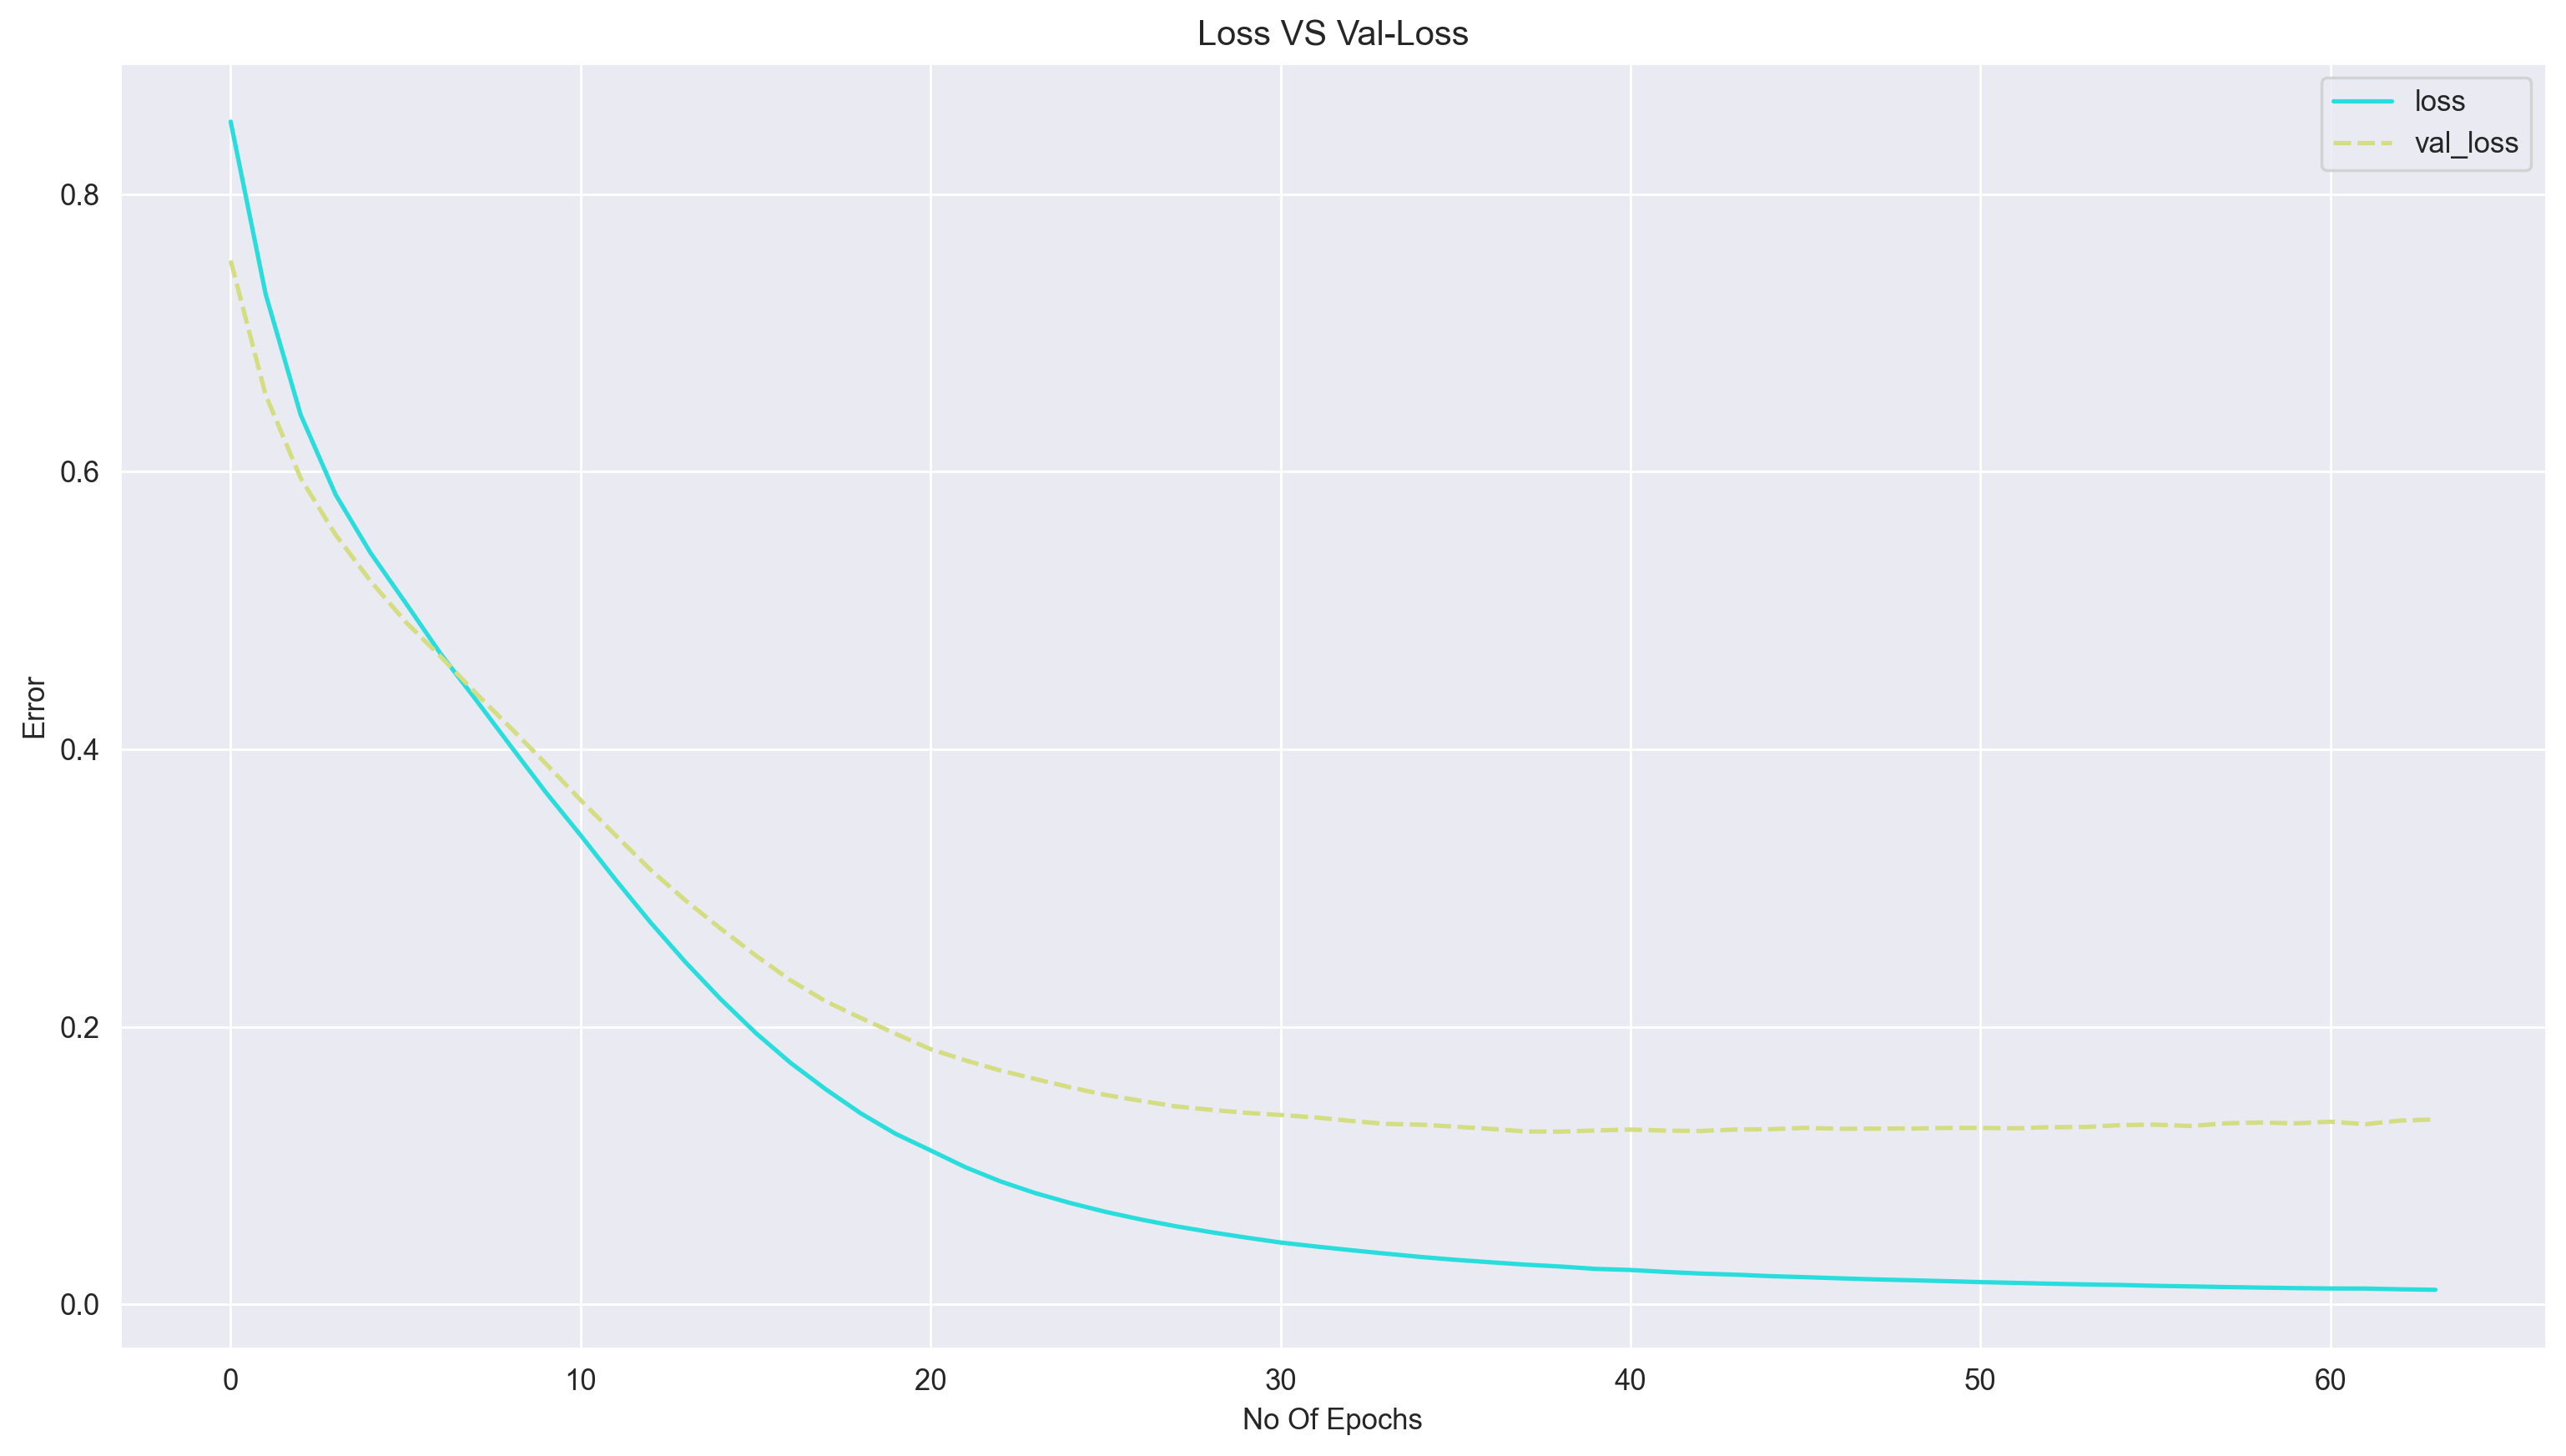

In [ ]:
val_loss_es = pd.DataFrame(ann_es.history.history)

sns.lineplot(data = val_loss_es, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

##### Creating Classification Report

In [ ]:
ypred_es = ann_es.predict(xtest)
ypred_es = ypred_es > 0.5

4/4 [==============================] - 0s 3ms/step


In [ ]:
print(classification_report(ytest,ypred_es))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.92      0.97      0.94        87

    accuracy                           0.91       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.91      0.91      0.91       114



### Creating Model With Drop Out Layer

#### Creating ANN Model

In [ ]:
ann_dol =Sequential()

##### Creating Hidden Layer

In [ ]:
ann_dol.add(Dense(units=30, activation='relu'))
ann_dol.add(Dropout(rate=0.5))

ann_dol.add(Dense(units=20, activation='relu'))
ann_dol.add(Dropout(rate=0.5))

##### Creating Output Layer

In [ ]:
ann_dol.add(Dense(units=1, activation='sigmoid'))

##### Connecting All Neurons In Each Layer

In [ ]:
ann_dol.compile(optimizer='adam', loss='binary_crossentropy')

##### Fitting Data

In [ ]:
ann_dol.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 50)

Epoch 1/50
11/11 [==============================] - 2s 33ms/step - loss: 0.9049 - val_loss: 0.7649
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 0.7830 - val_loss: 0.7092
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 0.7561 - val_loss: 0.6628
Epoch 4/50
11/11 [==============================] - 0s 13ms/step - loss: 0.6913 - val_loss: 0.6278
Epoch 5/50
11/11 [==============================] - 0s 13ms/step - loss: 0.7046 - val_loss: 0.6023
Epoch 6/50
11/11 [==============================] - 0s 12ms/step - loss: 0.6477 - val_loss: 0.5855
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 0.6327 - val_loss: 0.5705
Epoch 8/50
11/11 [==============================] - 0s 12ms/step - loss: 0.5922 - val_loss: 0.5557
Epoch 9/50
11/11 [==============================] - 0s 11ms/step - loss: 0.5975 - val_loss: 0.5413
Epoch 10/50
11/11 [==============================] - 0s 12ms/step - loss: 0.5734 - val_loss: 0.5269
Epoch 11/5

#### Evaluating The Model

##### Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

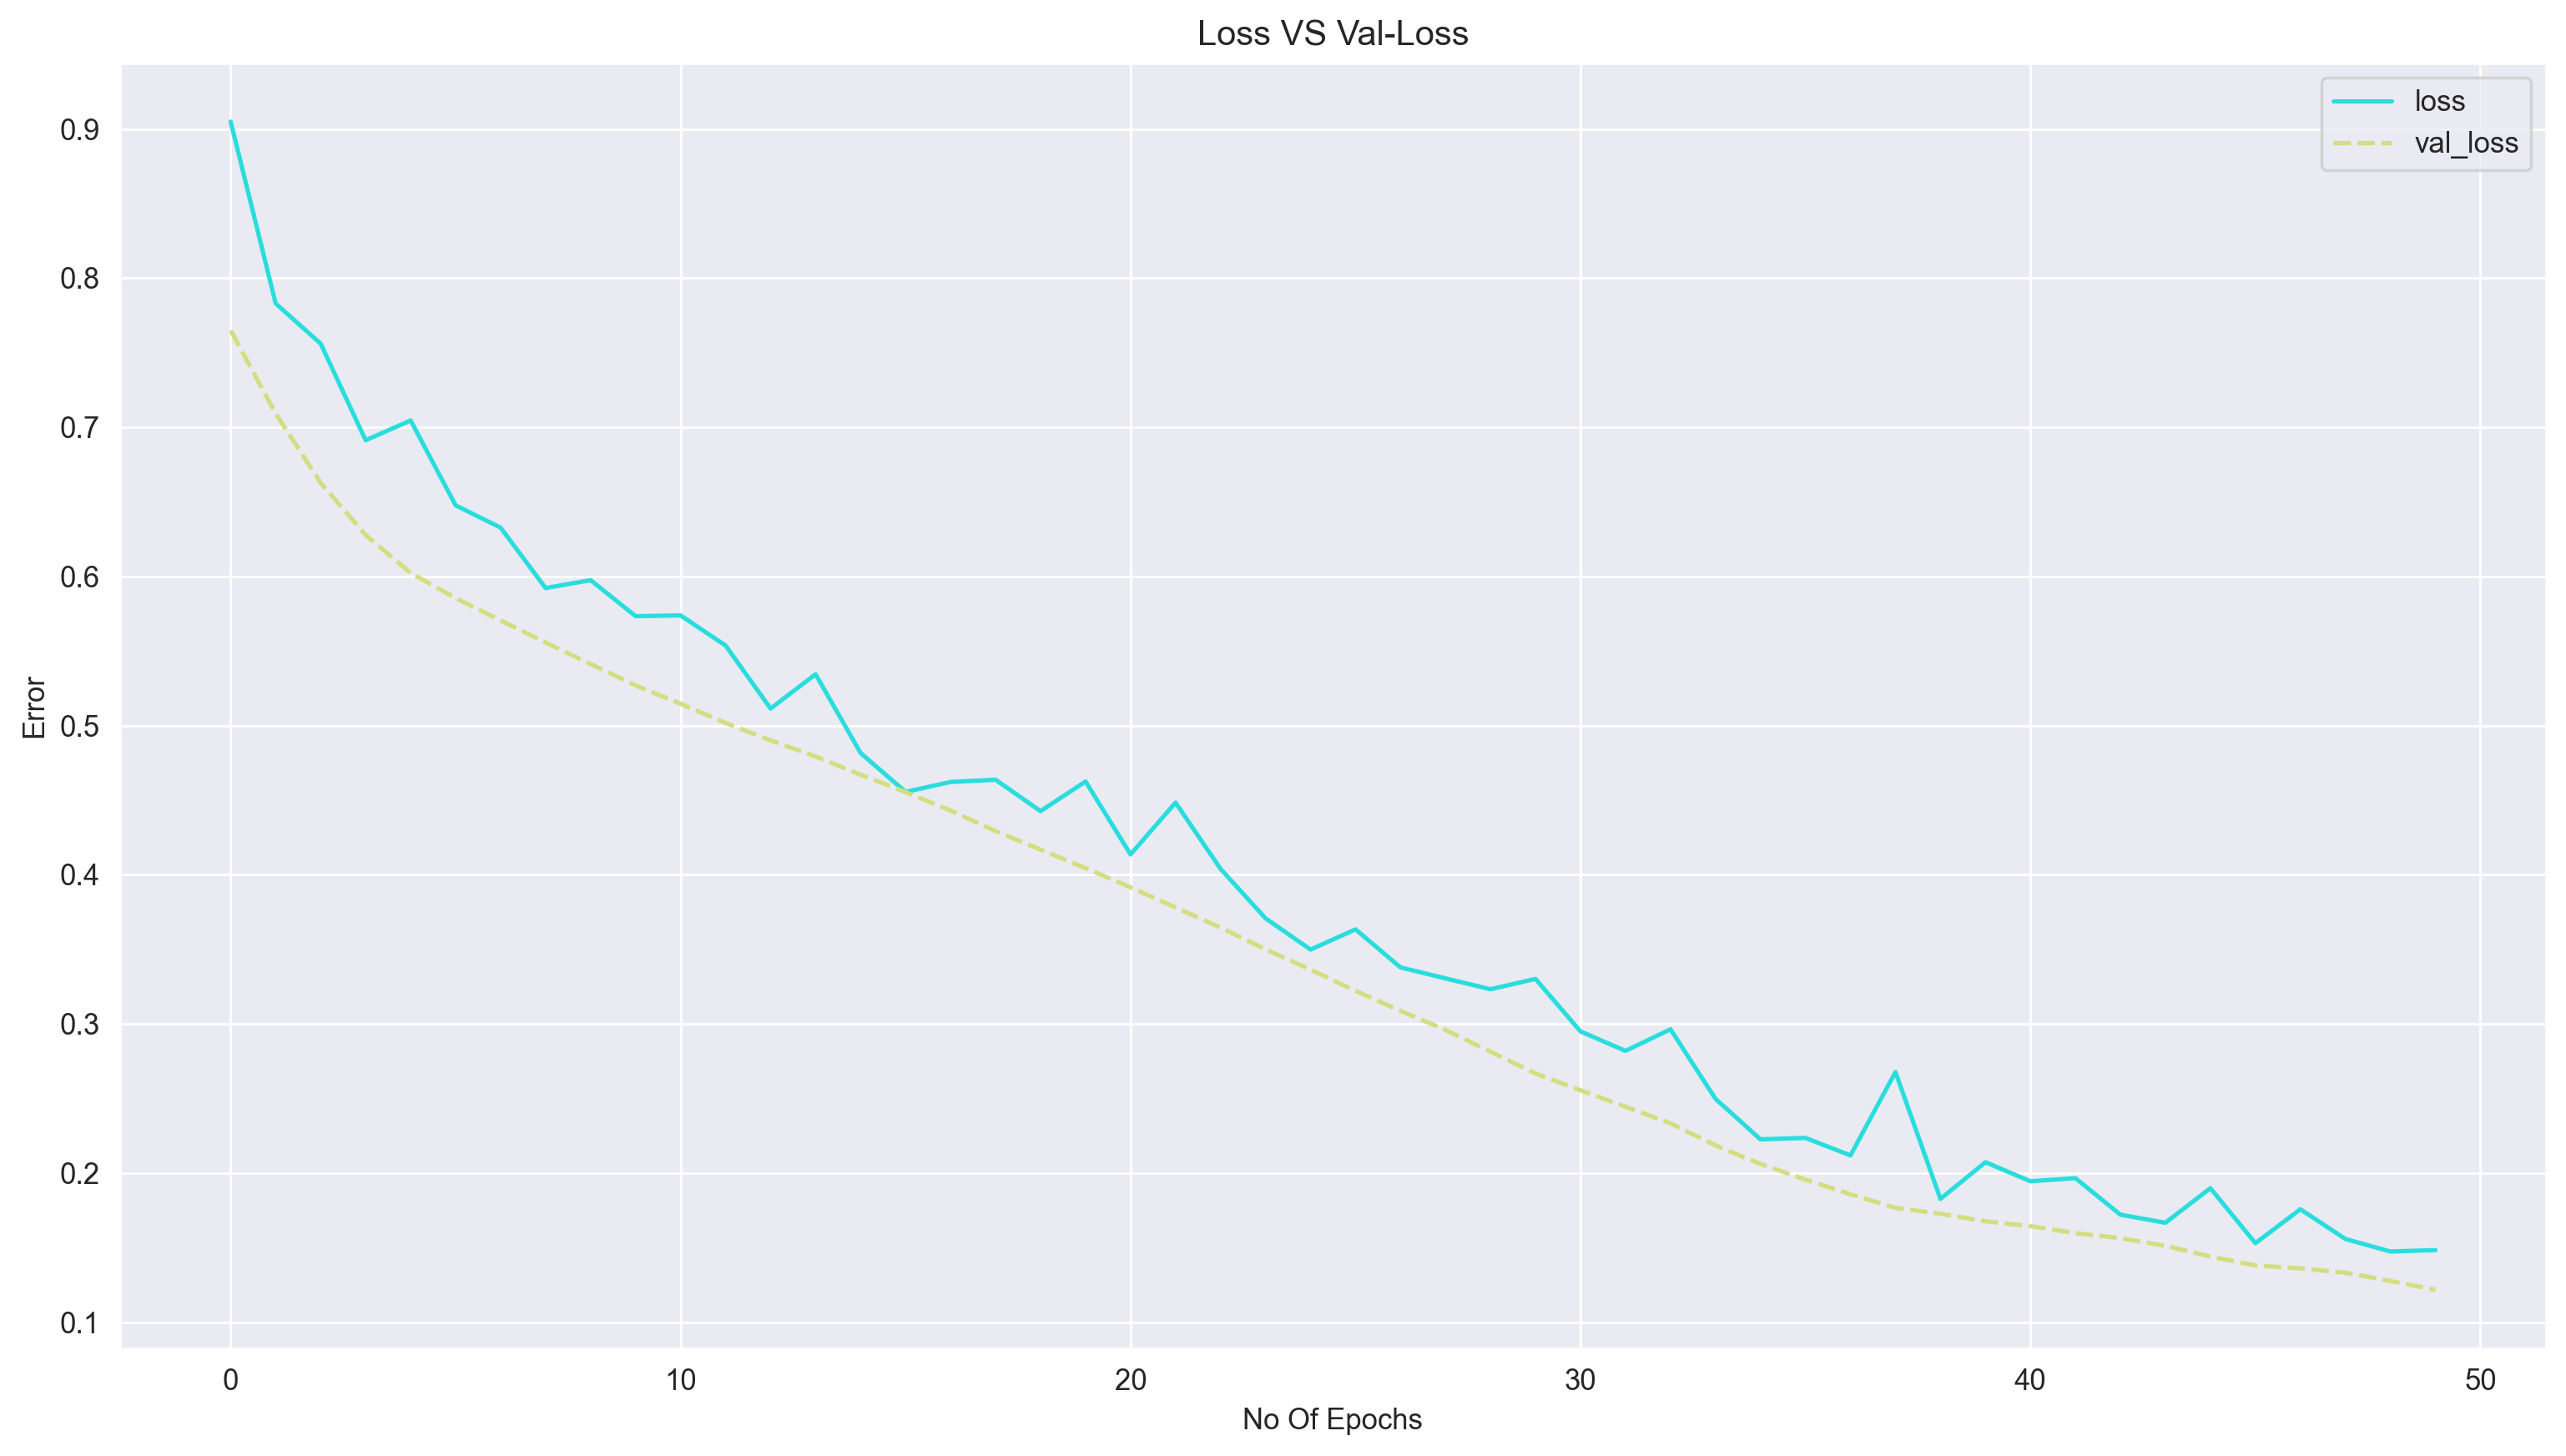

In [ ]:
val_loss_dol = pd.DataFrame(ann_dol.history.history)

sns.lineplot(data = val_loss_dol, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

##### Creating Classification Report

In [ ]:
ypred_dol = ann_dol.predict(xtest)
ypred_dol = ypred_dol > 0.5

4/4 [==============================] - 0s 5ms/step


In [ ]:
print(classification_report(ytest,ypred_dol))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.95      0.99      0.97        87

    accuracy                           0.95       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.95      0.95      0.95       114



### Creating Model With Early Stopping And Drop Out Layer

#### Creating ann Model

In [ ]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [ ]:
ann_all =Sequential()

##### Creating Hidden Layer

In [ ]:
ann_all.add(Dense(units=30, activation='relu'))
ann_all.add(Dropout(rate=0.5))

ann_all.add(Dense(units=20, activation='relu'))
ann_all.add(Dropout(rate=0.5))

##### Creating Output Layer

In [ ]:
ann_all.add(Dense(units=1, activation='sigmoid'))

##### Connecting All Neurons In Each Layer

In [ ]:
ann_all.compile(optimizer='adam', loss='binary_crossentropy')

##### Fitting Data

In [ ]:
ann_all.fit(xtrain, ytrain, validation_data = (xtest, ytest), callbacks=[early] , epochs = 100)

Epoch 1/100
11/11 [==============================] - 3s 49ms/step - loss: 0.7564 - val_loss: 0.6184
Epoch 2/100
11/11 [==============================] - 0s 11ms/step - loss: 0.6791 - val_loss: 0.5981
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6802 - val_loss: 0.5799
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6511 - val_loss: 0.5641
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 0.6361 - val_loss: 0.5517
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6342 - val_loss: 0.5409
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: 0.6095 - val_loss: 0.5310
Epoch 8/100
11/11 [==============================] - 0s 13ms/step - loss: 0.5972 - val_loss: 0.5210
Epoch 9/100
11/11 [==============================] - 0s 12ms/step - loss: 0.5568 - val_loss: 0.5123
Epoch 10/100
11/11 [==============================] - 0s 11ms/step - loss: 0.5537 - val_loss: 0.5046

#### Evaluating The Model

##### Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

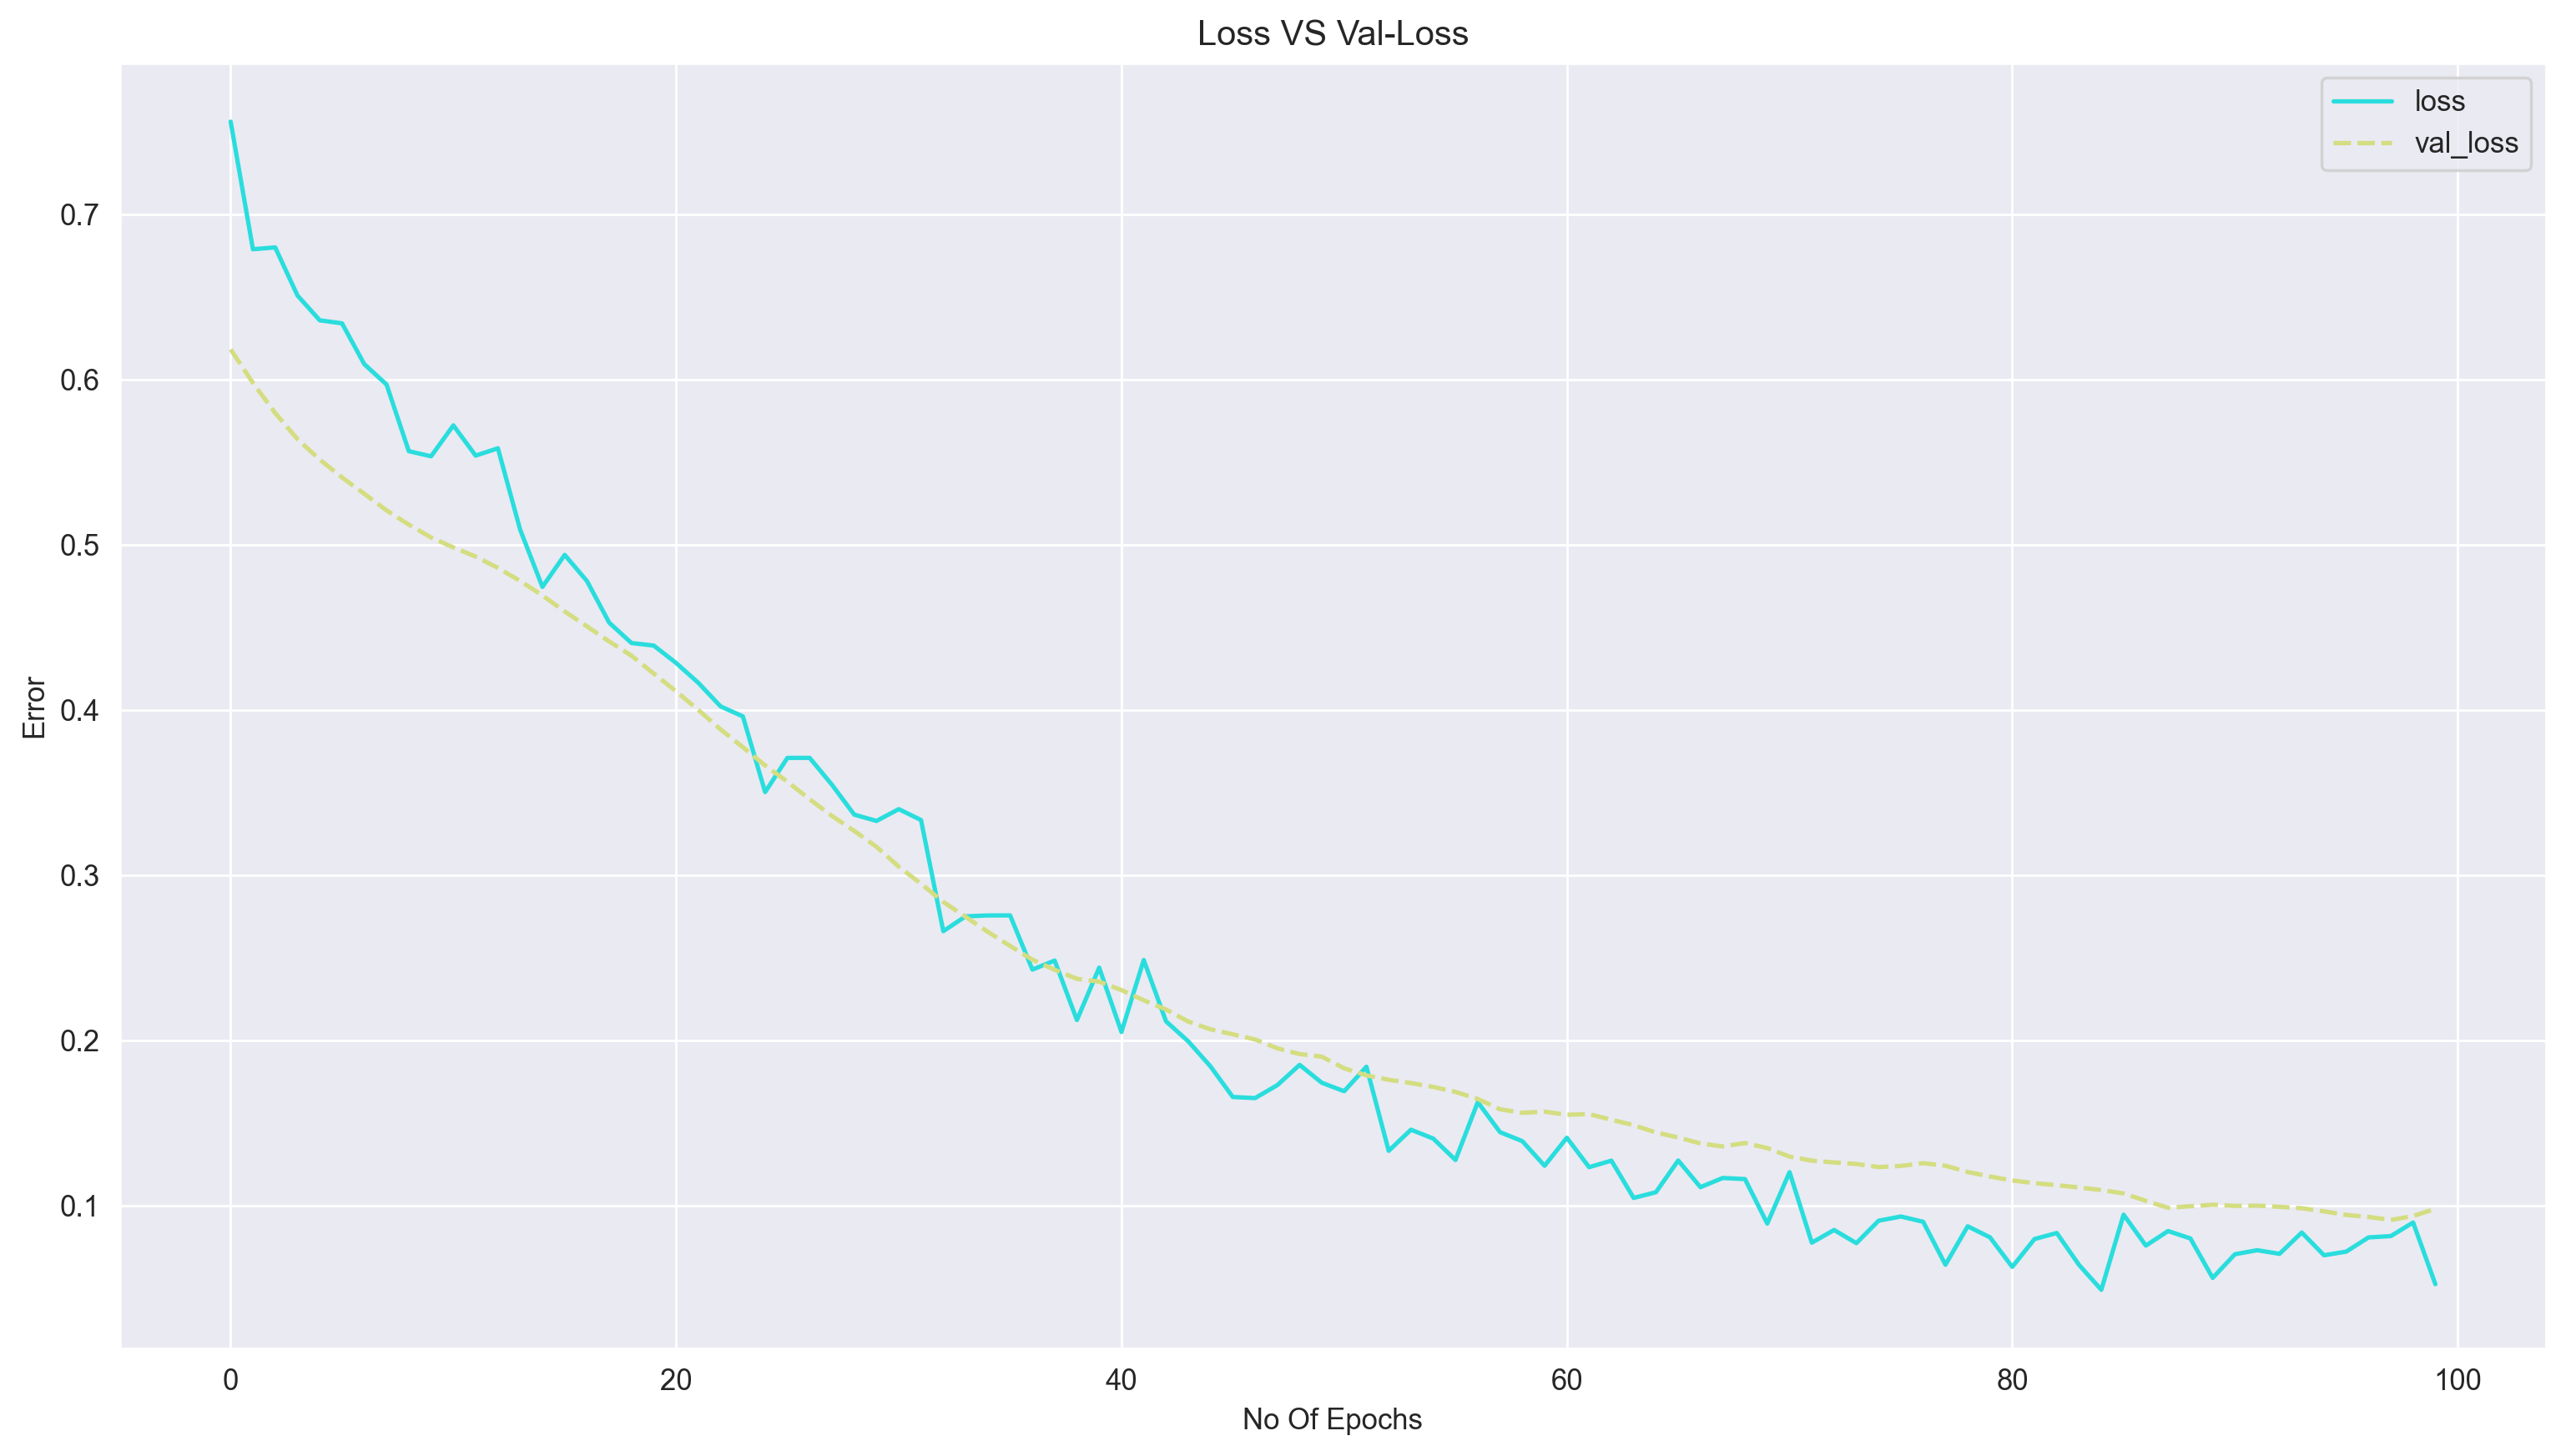

In [ ]:
val_loss_all = pd.DataFrame(ann_all.history.history)

sns.lineplot(data = val_loss_all, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

##### Creating Classification Report

In [ ]:
ypred_all = ann_all.predict(xtest)
ypred_all = ypred_all > 0.5

4/4 [==============================] - 0s 3ms/step


In [ ]:
print(classification_report(ytest,ypred_all))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.95      0.99      0.97        87

    accuracy                           0.95       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.95      0.95      0.95       114



### Compairing All Model

<AxesSubplot:title={'center':'Model With Early Stop And Drop Out Layer'}>

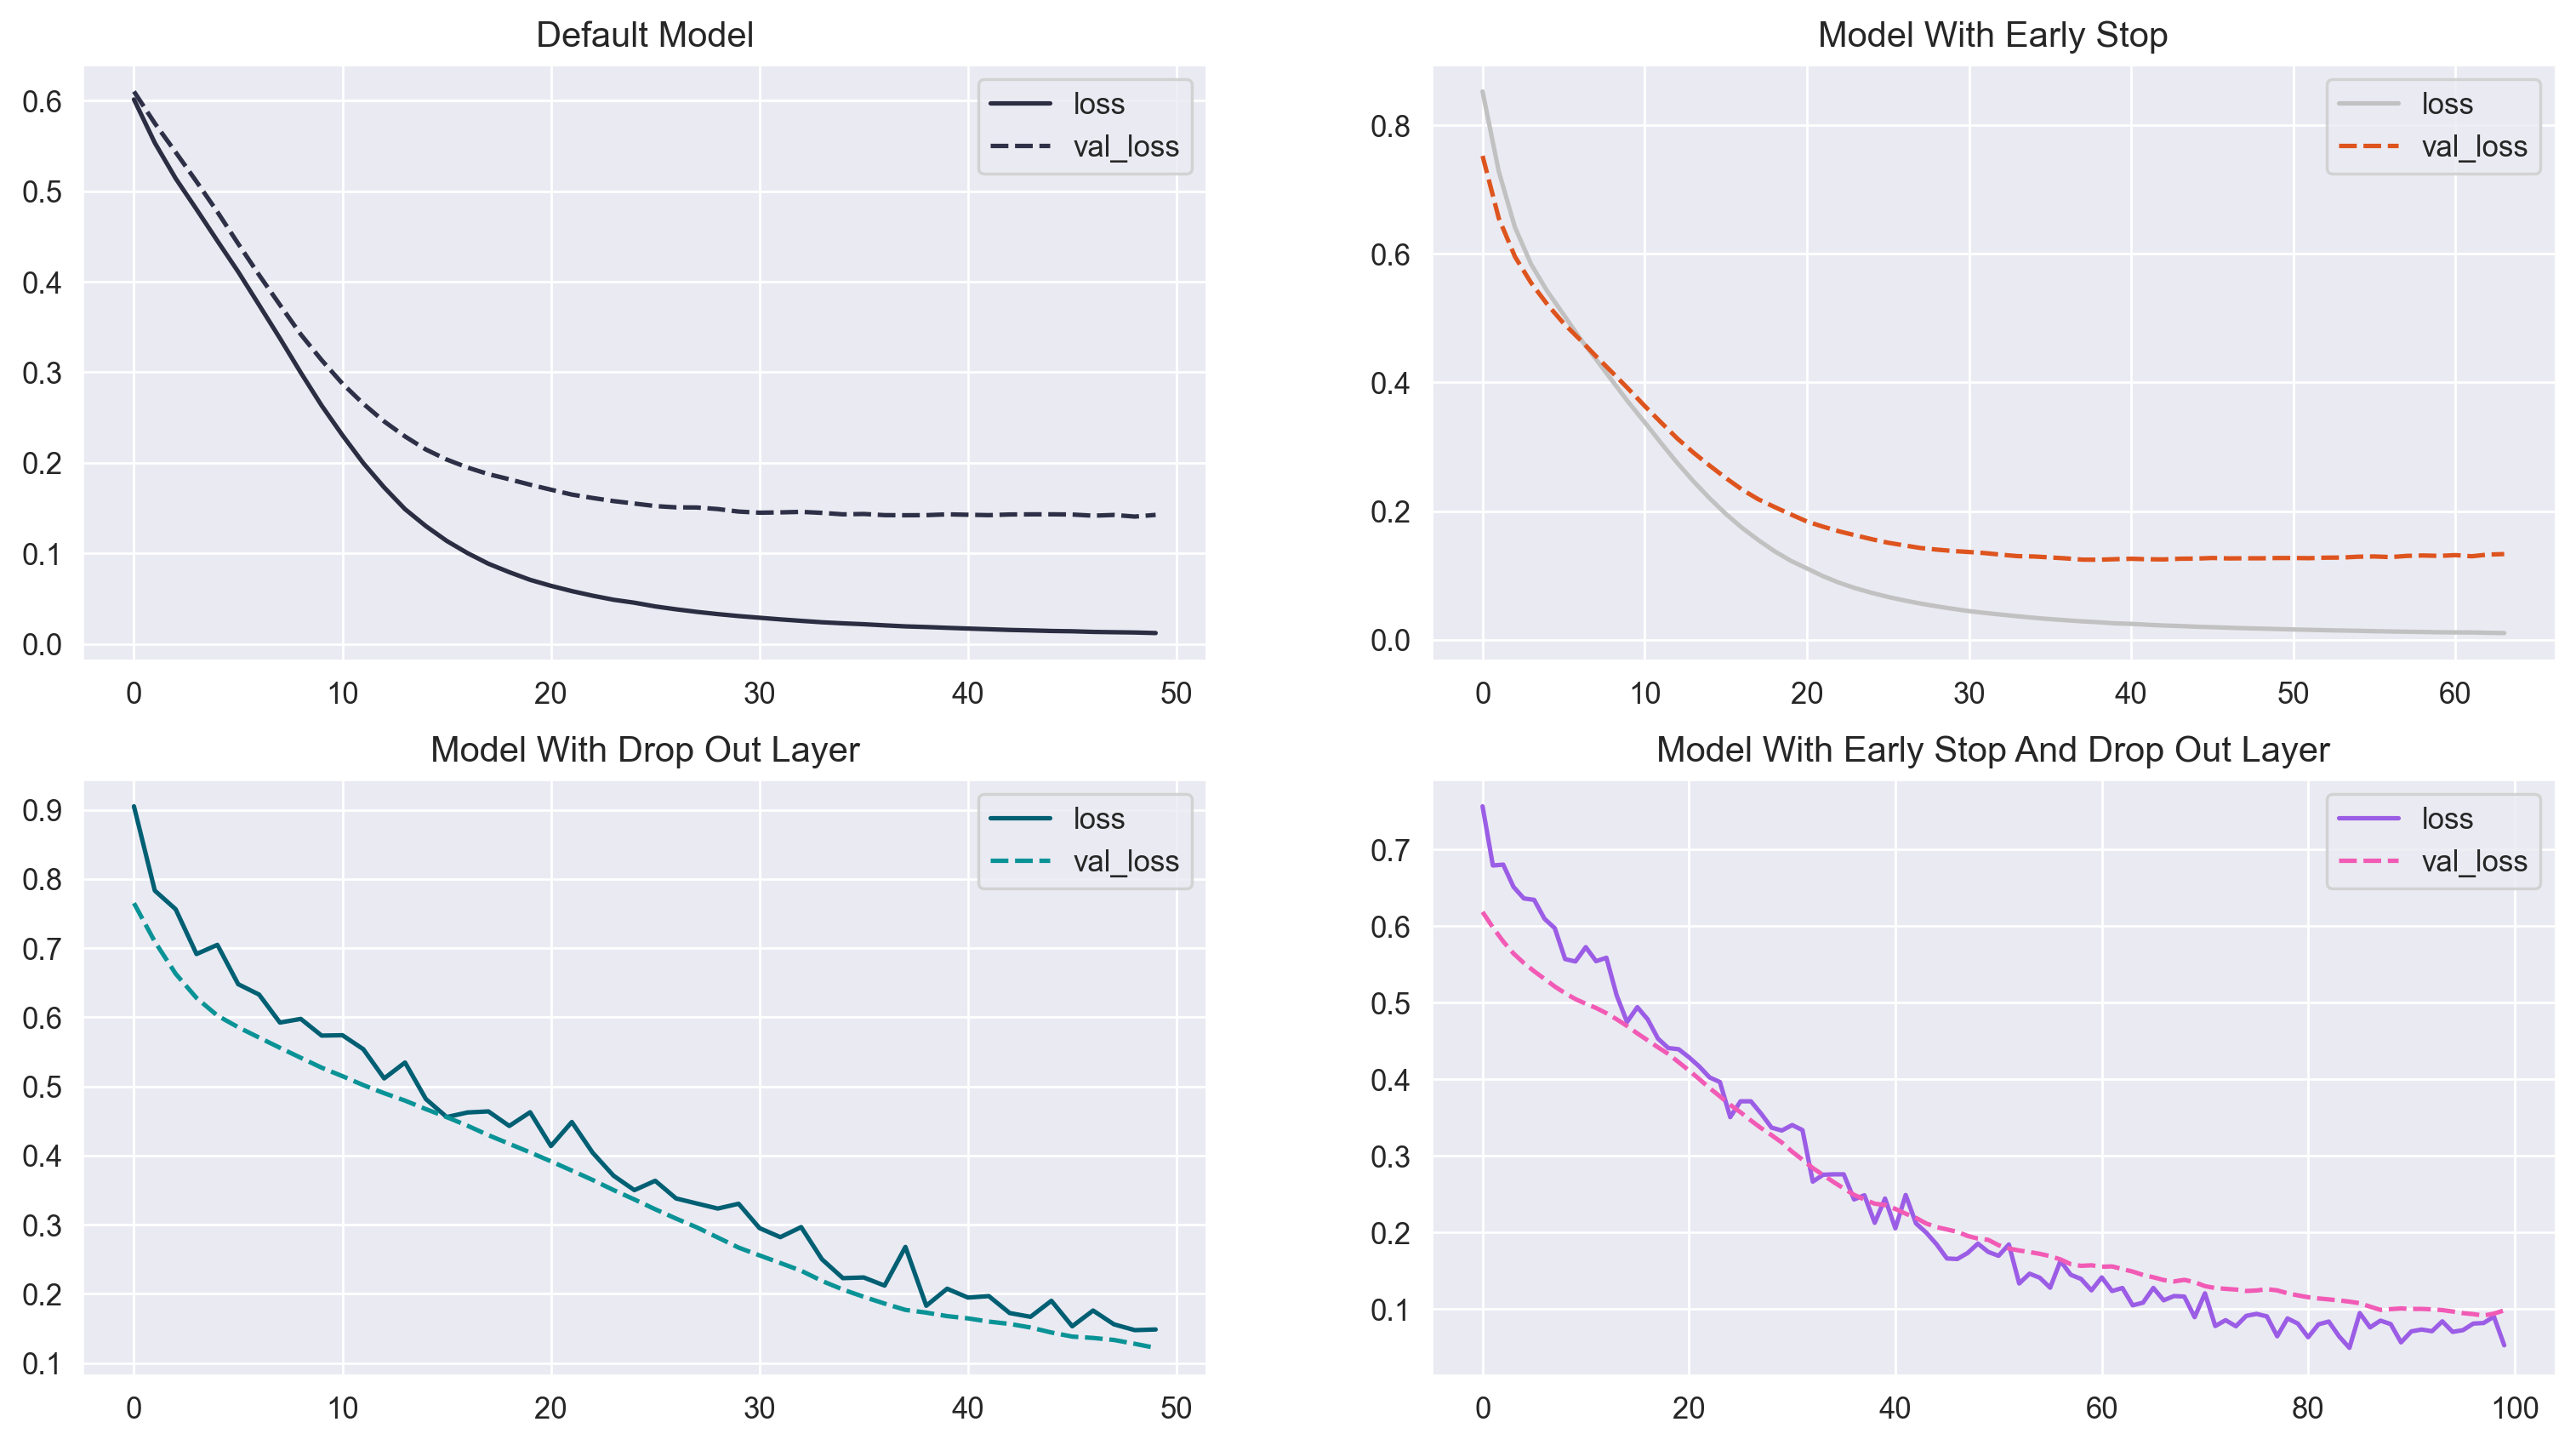

In [ ]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].title.set_text('Default Model')
sns.lineplot(data=val_loss_def, ax = ax[0, 0], palette = ['#2b2d42', '#2d3047'])

ax[0, 1].title.set_text('Model With Early Stop')
sns.lineplot(data=val_loss_es, ax = ax[0, 1], palette = ['#c2c1c2', '#de541e'])

ax[1, 0].title.set_text('Model With Drop Out Layer')
sns.lineplot(data=val_loss_dol, ax = ax[1, 0], palette = ['#005f73', '#0a9396'])

ax[1, 1].title.set_text('Model With Early Stop And Drop Out Layer')
sns.lineplot(data=val_loss_all, ax = ax[1, 1], palette = [ '#9b5de5', '#f15bb5'])